# Project Description


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.


# Dataset Link

https://github.com/dsrscientist/dataset1/blob/master/census_income.csv

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#setting up some default styles and parameters for data plots.
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#00FFFF'

In [3]:
df = pd.read_csv('C:\\Users\\Oscar Jacob\\census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Description of fnlwgt (final weight)


The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.

2.	Controls for Hispanic Origin by age and sex.

3.	Controls by Race, age and sex.


We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


# Exploratory Data Analysis


We are going to perform EDA and notedown preliminary observations. We will be looking for nulls and duplicated values in the process

In [4]:
#checking the shape of dataframe
df.shape

(32560, 15)

32560 rows and 15 columns

In [5]:
#checking the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#checking the datatype of each column
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [7]:
#top 5 data
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
#bottom 5 data
df.tail(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [9]:
#checkking unique values in the dataframe for each column
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [10]:
#getting the value count of each column in the data frame
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

In [11]:
#checking for duplicated values if present in the dataset
df.duplicated().sum()

24

In [12]:
#checking for null values if present in the dataset
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

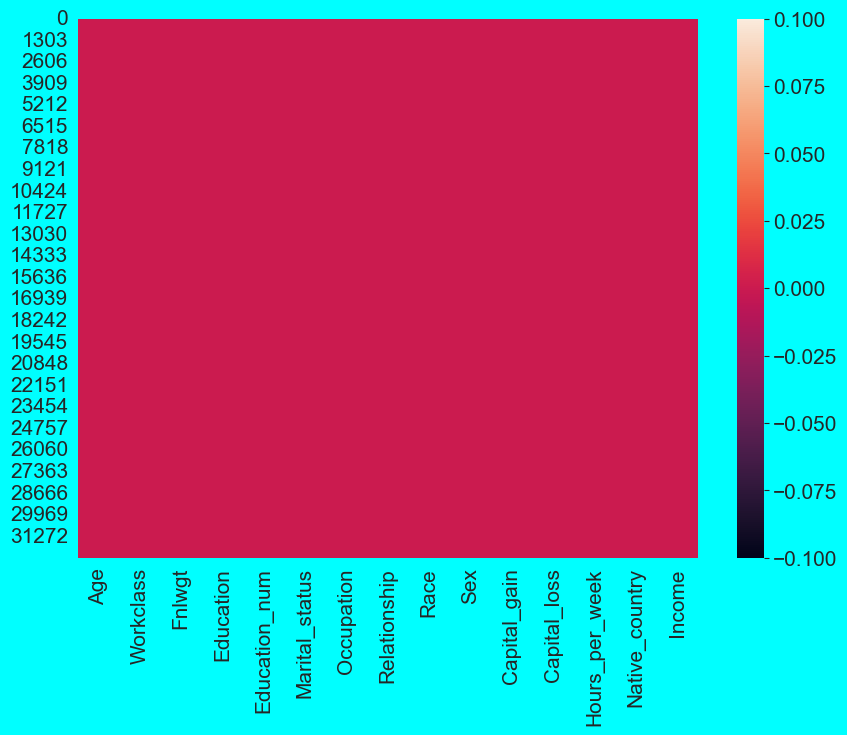

In [13]:
#visualizing the nulls using heatmap
sns.heatmap(df.isnull())

**Recording Observations**

'''

1. There are 9 object datatype columns which are categorical and discrete in nature

2. 6 columns are of datatype int and 5 of them are continous and numerical and nature and 1 is categorical, numerical and discrete in nature

3. In column workclass, occupation and native country there are missing/ unknown entry which needs to be dealt with seperately

4. there are 0 nulls/ NaN's in our dataset

5. 24 duplicated data present in our dataset

6. Target column ( income) is categorical and discrete in nature also it contains binary values. Hence this problem statement is based on binary classification. Also it is imbalanced.

7. We will drop education column as it has similar column named education_num but since it is of int type, we will not have to encode this column , hence it is not required for further analysis

'''



# Data preprocessing and Cleaning

In [14]:
#dropping duplicates

df.drop_duplicates(inplace = True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [17]:
df['Workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [18]:
df['Occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

In [19]:
df['Native_country'].value_counts()

 United-States                 29152
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [20]:
df.shape

(32536, 15)

In these 3 columns there is an ? entry which is not associated with any of the categories in the column. We are going to see if removing these entries will cause any significant change to our data.

In [21]:
df.shape

(32536, 15)

In [22]:
#str.strip() removes leading and trailing whitespaces

df = df[df['Native_country'].str.strip() != '?']
df.shape

(31954, 15)

In [23]:
df = df[df['Occupation'].str.strip() != '?']
df.shape

(30138, 15)

In [24]:
df = df[df['Workclass'].str.strip() != '?']
df.shape

(30138, 15)

In [25]:
df['Workclass'].value_counts()

 Private             22264
 Self-emp-not-inc     2498
 Local-gov            2067
 State-gov            1278
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: Workclass, dtype: int64

In [26]:
df['Native_country'].value_counts()

 United-States                 27486
 Mexico                          606
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        61
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [27]:
df['Occupation'].value_counts()

 Prof-specialty       4034
 Craft-repair         4025
 Exec-managerial      3991
 Adm-clerical         3718
 Sales                3584
 Other-service        3209
 Machine-op-inspct    1964
 Transport-moving     1572
 Handlers-cleaners    1349
 Farming-fishing       987
 Tech-support          911
 Protective-serv       644
 Priv-house-serv       141
 Armed-Forces            9
Name: Occupation, dtype: int64

In [28]:
df.drop(columns = ['Education'],inplace = True)

In [29]:
df.shape

(30138, 14)

we have removed the rows containing ? as entry and there is no significant change in the dataset

# Descriptive Analysis

In [30]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,30138.000000,3.013800e+04,30138.000000,30138.000000,30138.000000,30138.000000
mean,38.441702,1.897988e+05,10.122437,1092.805329,88.442863,40.934734
std,13.131643,1.056584e+05,2.548727,7409.230902,404.451628,11.978951
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176295e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784190e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376062e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Recording Observations**

**Age:**

The dataset includes individuals with ages ranging from 17 to 90.
The average age is approximately 38.44 years, with a standard deviation of about 13.13. This suggests a moderate degree of variability in ages.
The interquartile range (IQR), the range between the 25th and 75th percentiles, is from 28 to 47 years, indicating where the middle 50% of ages lie.


**Fnlwgt (Final Weight):**

The final weight variable seems to have a wide range, with values from 13,769 to 1,484,705.
The mean final weight is around 189,798.8, with a standard deviation of approximately 105,658.4. This indicates a significant spread in the final weights of individuals.


**Education_num:**

Education_num ranges from 1 to 16, with a mean of 10.12 and a standard deviation of 2.55.
The majority of individuals seem to have education numbers around 9 to 13, as indicated by the interquartile range.


**Capital_gain:**

Capital gain varies widely, with a minimum of 0 and a maximum of 99,999.
The average capital gain is 1092.81, but the standard deviation is high at 7409.23, suggesting a skewed distribution with a few individuals having significantly higher gains.


**Capital_loss:**

Capital loss also shows variability, ranging from 0 to 4356.
The average capital loss is 88.44, with a standard deviation of 404.45.


**Hours_per_week:**

The average number of hours worked per week is approximately 40.93, with a standard deviation of 11.98.
The range is from 1 to 99 hours, and the majority of individuals work around 40 hours per week, as suggested by the median and the interquartile range.


**Observations and Potential Insights:**


**Age Distribution:**

The workforce in the dataset is diverse in terms of age, with a relatively balanced distribution across different age groups.
The standard deviation in age suggests that there is a fair amount of variability, and the interquartile range indicates that the middle 50% of individuals fall within a 19-year age range.


**Education and Occupation:**

The education_num column provides a numerical representation of education levels. Further analysis could involve mapping these numerical values to corresponding education levels.
The dataset might contain information about the occupation and income levels associated with different education levels.


**Financial Aspects:**

The wide range of final weights, capital gains, and capital losses suggests a diverse economic background within the dataset.
Individuals with high capital gains or losses might be of interest for further investigation, as they could represent unique financial situations.


**Work Hours:**

The majority of individuals work around 40 hours per week, which is a standard full-time workweek.
Understanding the distribution of work hours can provide insights into employment patterns and potentially highlight part-time or full-time workers.

# Graphical Analysis

In [31]:
df.shape

(30138, 14)

In [32]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [33]:
#getting the value count of each column in the data frame
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: Age, Length: 72, dtype: int64


 Private             22264
 Self-emp-not-inc     2498
 Local-gov            2067
 State-gov            1278
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: Workclass, dtype: int64


203488    13
113364    12
148995    12
123011    12
121124    12
          ..
242077     1
327112     1
194475     1
303510     1
201490     1
Name: Fnlwgt, Length: 20262, dtype: int64


9     9834
10    6669
13    5041
14    1626
11    1307
7     1048
12    1008
6      820
4      556
15     542
5      455
8      377
16     375
3      287
2      149
1       44
Name: Education_num, dtype: int64


 Married-civ-spouse       14059
 Never-married             9710
 Divorced                  4212
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: Ma

In [34]:
#checkking unique values in the dataframe for each column
df.nunique()

Age                  72
Workclass             7
Fnlwgt            20262
Education_num        16
Marital_status        7
Occupation           14
Relationship          6
Race                  5
Sex                   2
Capital_gain        118
Capital_loss         90
Hours_per_week       94
Native_country       41
Income                2
dtype: int64

In [35]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

**Univariate Analysis**

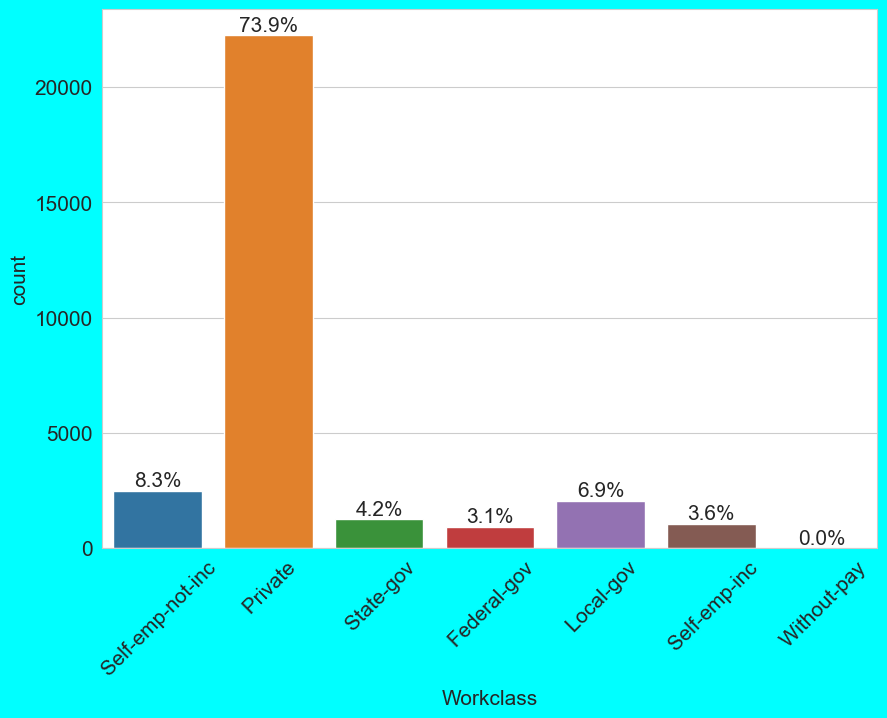

 Private             22264
 Self-emp-not-inc     2498
 Local-gov            2067
 State-gov            1278
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: Workclass, dtype: int64

In [36]:
#countplot for Workclass column

ax = sns.countplot(x = 'Workclass', data = df)
# Get the total number of rows in the DataFrame
total = len(df)

# Loop through the bars and annotate them with percentages
for p in ax.patches:
    # Calculate the percentage
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    # Get the x and y coordinates of the bar
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Annotate the bar with the percentage
    plt.text(x, y, percentage, ha='center', va='bottom')
    
    # Change fontsize and alignment of x axis labels
    ax.tick_params(axis='x', labelsize=15)  # Change fontsize here
    plt.xticks(rotation=45)  # Change alignment here

# Show the plot
plt.show()

df['Workclass'].value_counts()

Text(0, 0.5, '')

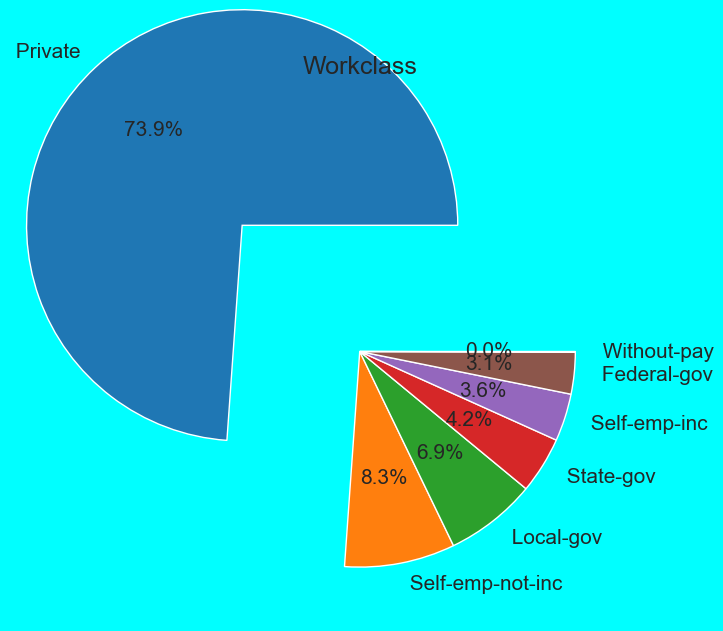

In [37]:
#Visualizing using pie plot
# Define the data and the column to plot
data = df
column = 'Workclass'

# Get the counts of each category
x = data[column].value_counts()

# Plot the pie chart
plt.pie(x, labels=x.index, autopct='%0.01f%%', explode=(0.8,0,0,0,0,0,0))

# Add title and remove y-axis label
plt.title('Workclass')
plt.ylabel('')

**General Observations and Recommendations:**

1. 73.9% of the employees work in private sector and a significant amount of employees work in other departments.

2. There are only a few employees who are working without pay 

**Diversity in Employment:**

The dataset reflects a diverse range of employment types, including both private and public sectors, as well as self-employment.
Analyzing the distribution of individuals across these employment types can provide insights into the economic landscape represented in the data.


**Income Disparities:**

Consider exploring how income levels vary across different employment types. This could involve comparing average incomes or income distributions for each category.


**Occupational Patterns:**

Investigate the types of occupations or industries associated with each employment type. This can provide a more detailed understanding of the work individuals are engaged in.



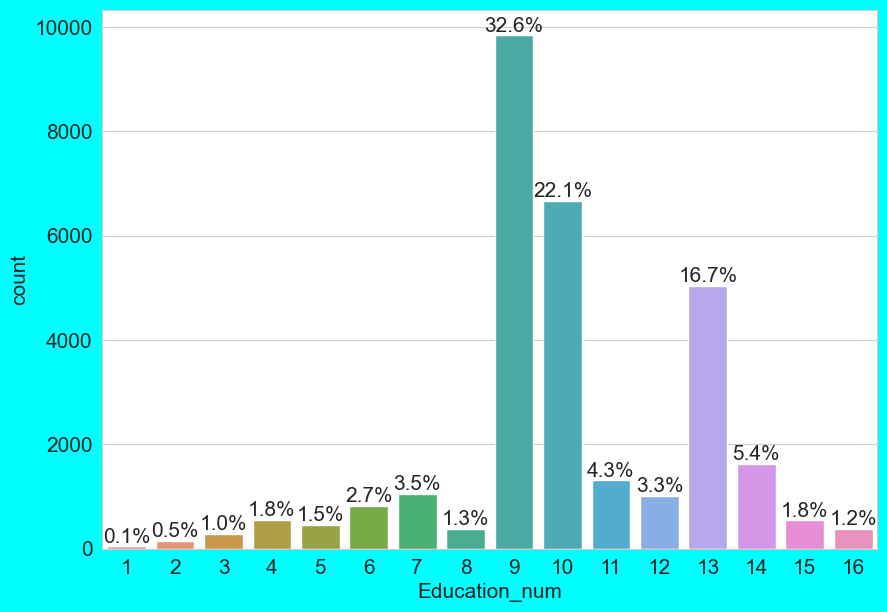

9     9834
10    6669
13    5041
14    1626
11    1307
7     1048
12    1008
6      820
4      556
15     542
5      455
8      377
16     375
3      287
2      149
1       44
Name: Education_num, dtype: int64

In [38]:
#countplot for 'Education_num' column

ax = sns.countplot(x = 'Education_num', data = df)
# Get the total number of rows in the DataFrame
total = len(df)

# Loop through the bars and annotate them with percentages
for p in ax.patches:
    # Calculate the percentage
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    # Get the x and y coordinates of the bar
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Annotate the bar with the percentage
    plt.text(x, y, percentage, ha='center', va='bottom')

# Show the plot
plt.show()

df['Education_num'].value_counts()

Text(0, 0.5, '')

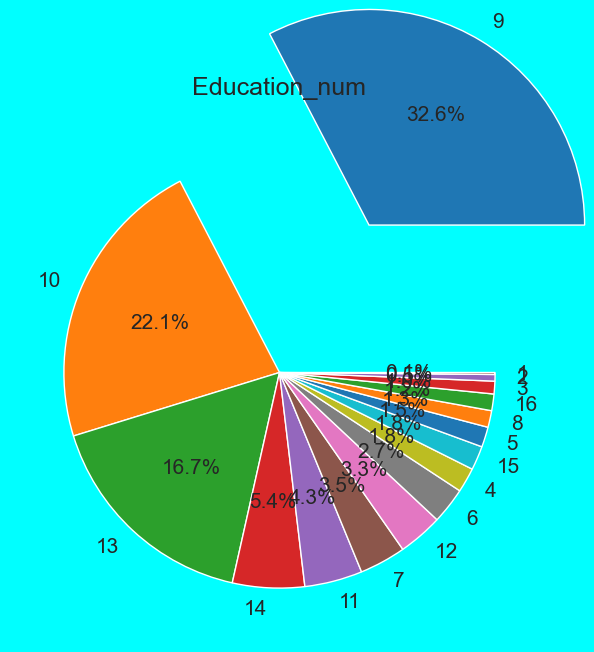

In [39]:
#Visualizing using pie plot
# Define the data and the column to plot
data = df
column = 'Education_num'

# Get the counts of each category
x = data[column].value_counts()

# Plot the pie chart
plt.pie(x, labels=x.index, autopct='%0.01f%%', explode=(0.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0))

# Add title and remove y-axis label
plt.title('Education_num')
plt.ylabel('')

**Key Observations:**
    
1. Education number 9 which corresponds to High school Graduate is the most common among the individuals in the dataset.

2. Education number 1 which corresponds to Preschool  might represent individuals with very limited formal education.


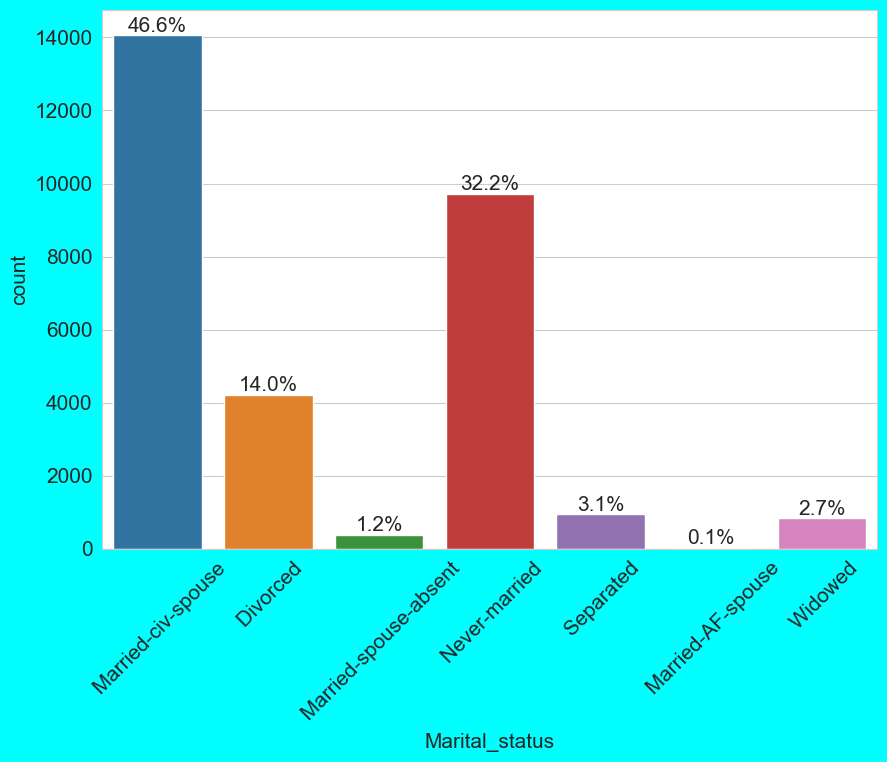

 Married-civ-spouse       14059
 Never-married             9710
 Divorced                  4212
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: Marital_status, dtype: int64

In [40]:
#countplot for 'Marital_status' column

ax = sns.countplot(x = 'Marital_status', data = df)
# Get the total number of rows in the DataFrame
total = len(df)

# Loop through the bars and annotate them with percentages
for p in ax.patches:
    # Calculate the percentage
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    # Get the x and y coordinates of the bar
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Annotate the bar with the percentage
    plt.text(x, y, percentage, ha='center', va='bottom',fontsize = 15)
    
    # Change fontsize and alignment of x axis labels
    ax.tick_params(axis='x', labelsize=15)  # Change fontsize here
    plt.xticks(rotation=45)  # Change alignment here

# Show the plot
plt.show()

df['Marital_status'].value_counts()

Text(0, 0.5, '')

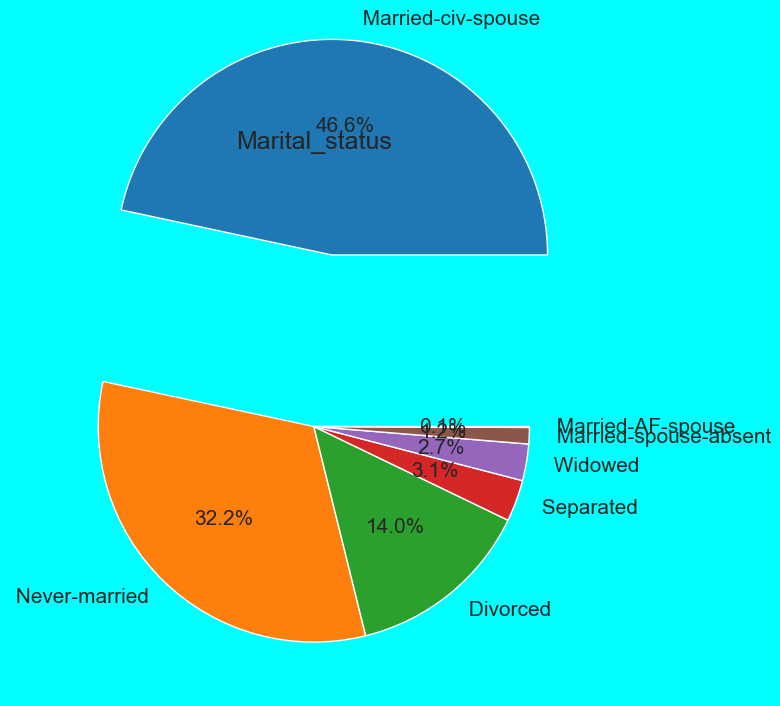

In [41]:
#Visualizing using pie plot
# Define the data and the column to plot
data = df
column = 'Marital_status'

# Get the counts of each category
x = data[column].value_counts()

# Plot the pie chart
plt.pie(x, labels=x.index, autopct='%0.01f%%', explode=(0.8,0,0,0,0,0,0))

# Add title and remove y-axis label
plt.title('Marital_status')
plt.ylabel('')

**Recording Observations:**
    
1. Married-civ-spouse (14059): This category likely represents individuals who are married to a civilian spouse. This is the most common marital status in the provided dataset, with a significant number of individuals falling into this category.
    
2. Married-AF-spouse (21): This category likely represents individuals who are married to someone serving in the United States Air Force (AF). It is the smallest group in the dataset, suggesting that marriage to a military spouse is less common in this sample.



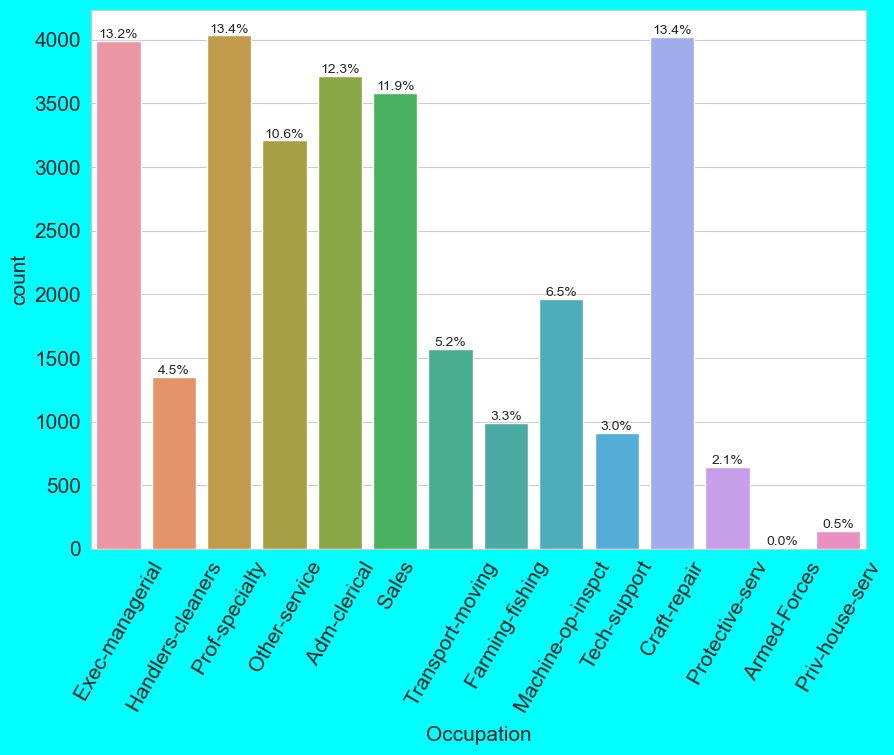

 Prof-specialty       4034
 Craft-repair         4025
 Exec-managerial      3991
 Adm-clerical         3718
 Sales                3584
 Other-service        3209
 Machine-op-inspct    1964
 Transport-moving     1572
 Handlers-cleaners    1349
 Farming-fishing       987
 Tech-support          911
 Protective-serv       644
 Priv-house-serv       141
 Armed-Forces            9
Name: Occupation, dtype: int64

In [42]:
#countplot for 'Occupation' column

ax = sns.countplot(x = 'Occupation', data = df)
# Get the total number of rows in the DataFrame
total = len(df)

# Loop through the bars and annotate them with percentages
for p in ax.patches:
    # Calculate the percentage
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    # Get the x and y coordinates of the bar
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Annotate the bar with the percentage
    plt.text(x, y, percentage, ha='center', va='bottom',fontsize = 10)
    
    # Change fontsize and alignment of x axis labels
    ax.tick_params(axis='x', labelsize=15)  # Change fontsize here
    plt.xticks(rotation=60)  # Change alignment here

# Show the plot
plt.show()

df['Occupation'].value_counts()

Text(0, 0.5, '')

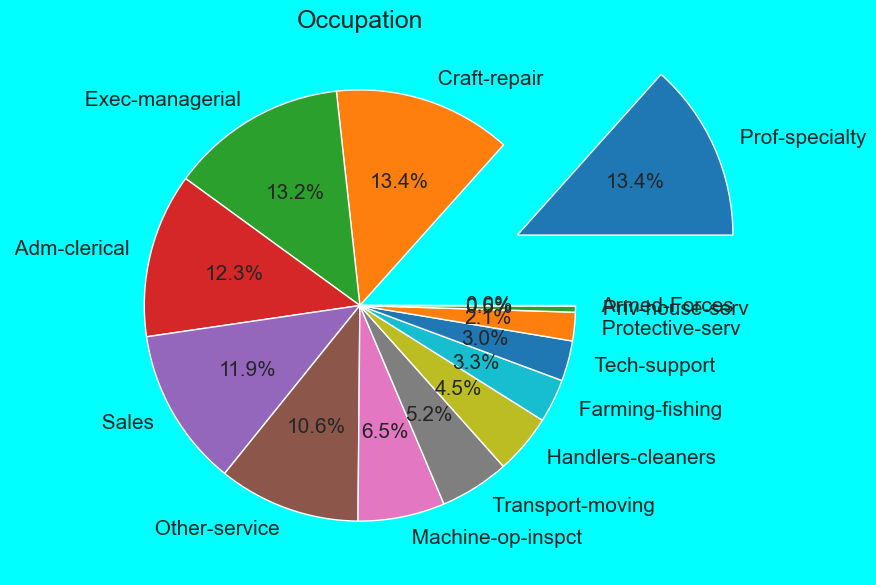

In [43]:
#Visualizing using pie plot
# Define the data and the column to plot
data = df
column = 'Occupation'

# Get the counts of each category
x = data[column].value_counts()

# Plot the pie chart
plt.pie(x, labels=x.index, autopct='%0.01f%%', explode=(0.8,0,0,0,0,0,0,0,0,0,0,0,0,0))

# Add title and remove y-axis label
plt.title('Occupation')
plt.ylabel('')

**Recording Observations:**

1. Prof-specialty (4034): This category likely includes individuals in professional and specialized occupations, such as doctors, lawyers, engineers, or other highly skilled professionals.
    
    

2. Armed-Forces (9): This category likely represents individuals serving in the military. It is the smallest group in the dataset, indicating that military service is less common in this sample.

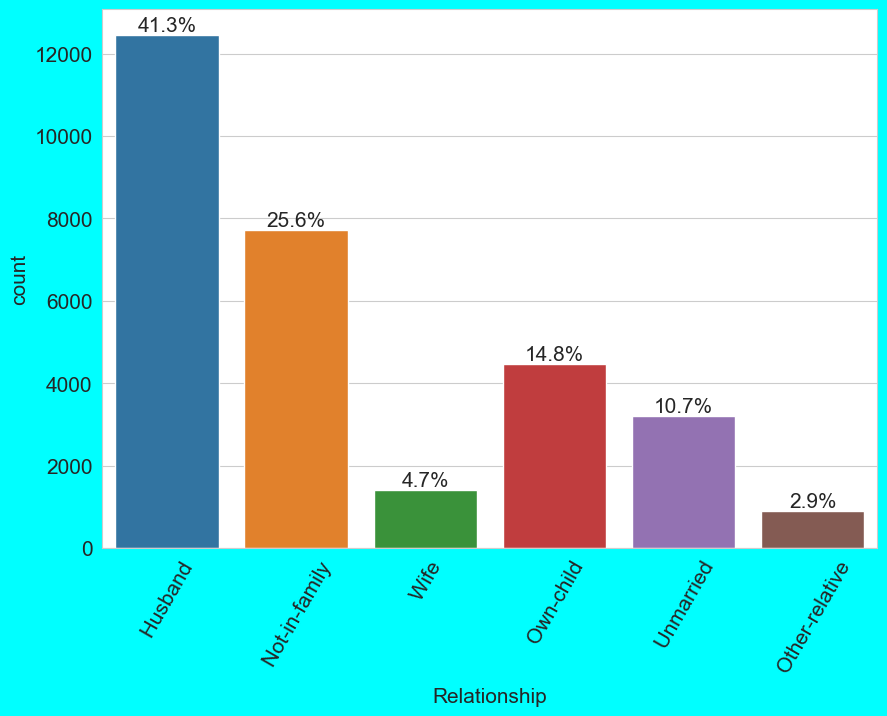

 Husband           12457
 Not-in-family      7713
 Own-child          4462
 Unmarried          3211
 Wife               1406
 Other-relative      889
Name: Relationship, dtype: int64

In [44]:
#countplot for 'Relationship' column

ax = sns.countplot(x = 'Relationship', data = df)
# Get the total number of rows in the DataFrame
total = len(df)

# Loop through the bars and annotate them with percentages
for p in ax.patches:
    # Calculate the percentage
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    # Get the x and y coordinates of the bar
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Annotate the bar with the percentage
    plt.text(x, y, percentage, ha='center', va='bottom',fontsize = 15)
    
    # Change fontsize and alignment of x axis labels
    ax.tick_params(axis='x', labelsize=15)  # Change fontsize here
    plt.xticks(rotation=60)  # Change alignment here

# Show the plot
plt.show()

df['Relationship'].value_counts()

Text(0, 0.5, '')

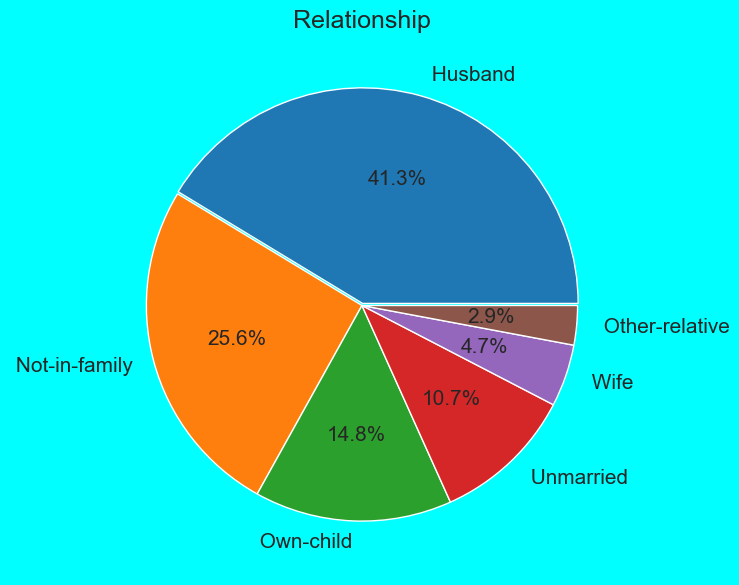

In [45]:
#Visualizing using pie plot
# Define the data and the column to plot
data = df
column = 'Relationship'

# Get the counts of each category
x = data[column].value_counts()

# Plot the pie chart
plt.pie(x, labels=x.index, autopct='%0.01f%%', explode=(0.01,0,0,0,0,0))

# Add title and remove y-axis label
plt.title('Relationship')
plt.ylabel('')

**Recording Observations:**
    
1. Husband (12457): This category likely represents individuals who are identified as husbands in the dataset. These individuals are likely to be married and considered the head of their respective households.
    
    
2. Other-relative (889): This category includes individuals who are related to the household in a way other than as a spouse, child, or immediate family member. This could include extended family members such as aunts, uncles, or cousins.   

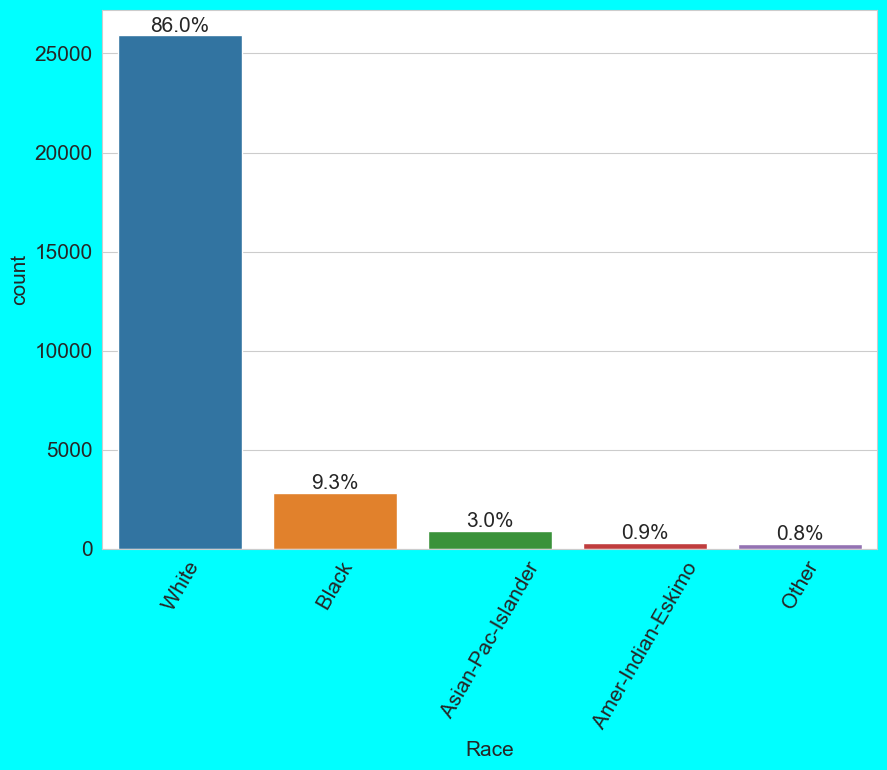

 White                 25911
 Black                  2816
 Asian-Pac-Islander      894
 Amer-Indian-Eskimo      286
 Other                   231
Name: Race, dtype: int64

In [46]:
#countplot for 'Race' column

ax = sns.countplot(x = 'Race', data = df)
# Get the total number of rows in the DataFrame
total = len(df)

# Loop through the bars and annotate them with percentages
for p in ax.patches:
    # Calculate the percentage
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    # Get the x and y coordinates of the bar
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Annotate the bar with the percentage
    plt.text(x, y, percentage, ha='center', va='bottom',fontsize = 15)
    
    # Change fontsize and alignment of x axis labels
    ax.tick_params(axis='x', labelsize=15)  # Change fontsize here
    plt.xticks(rotation=60)  # Change alignment here

# Show the plot
plt.show()

df['Race'].value_counts()

Text(0, 0.5, '')

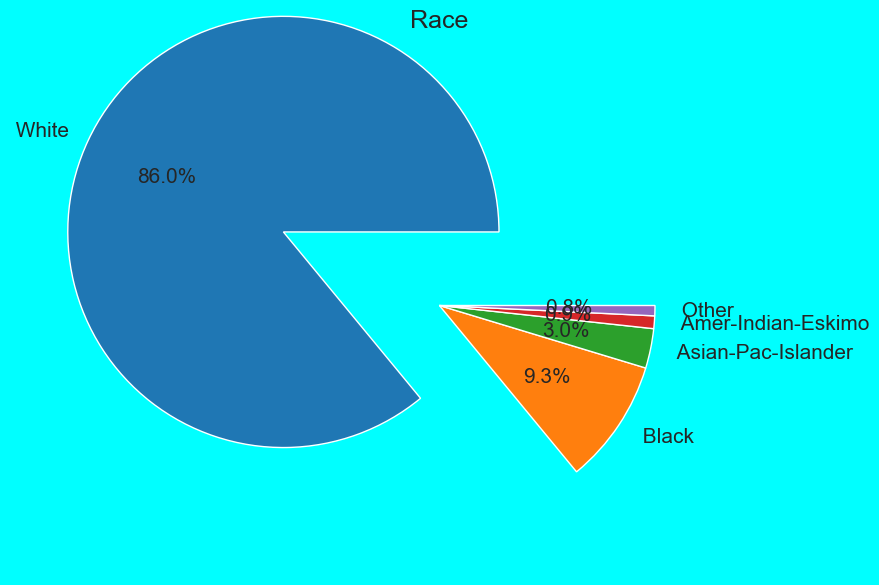

In [47]:
#Visualizing using pie plot
# Define the data and the column to plot
data = df
column = 'Race'

# Get the counts of each category
x = data[column].value_counts()

# Plot the pie chart
plt.pie(x, labels=x.index, autopct='%0.01f%%', explode=(0.8,0,0,0,0))

# Add title and remove y-axis label
plt.title('Race')
plt.ylabel('')

**Recording Observations:**

1. White (25911): This category is the largest and likely represents individuals who identify as White or Caucasian. It is a common racial category in many demographic datasets.
    
    
2. Other (231): This category includes individuals who don't fall into the previous cate
gories. It might encompass individuals with mixed racial backgrounds or those who identify with a specific racial or ethnic group not covered by the other categories.

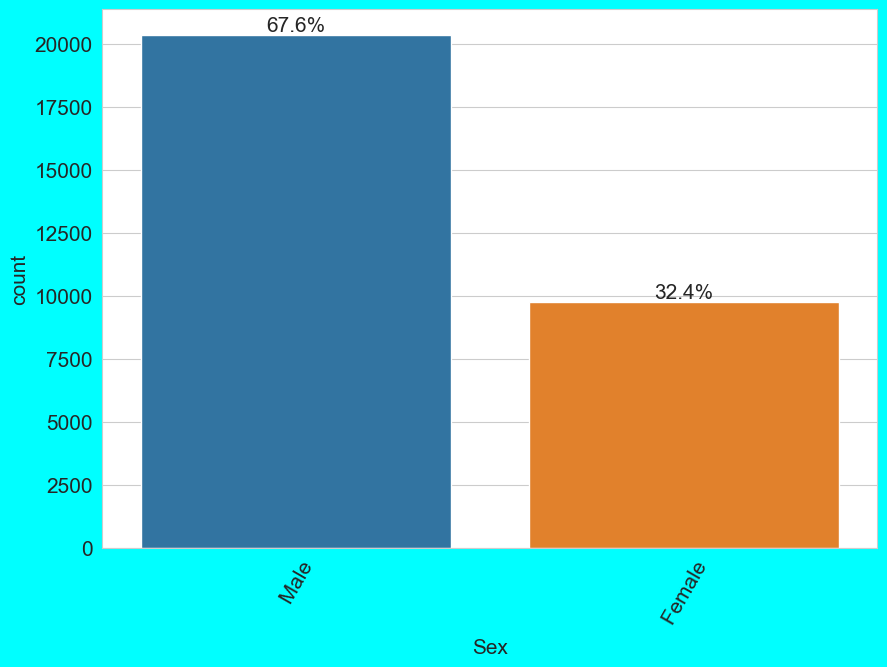

 Male      20365
 Female     9773
Name: Sex, dtype: int64

In [48]:
#countplot for 'Sex' column

ax = sns.countplot(x = 'Sex', data = df)
# Get the total number of rows in the DataFrame
total = len(df)

# Loop through the bars and annotate them with percentages
for p in ax.patches:
    # Calculate the percentage
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    # Get the x and y coordinates of the bar
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Annotate the bar with the percentage
    plt.text(x, y, percentage, ha='center', va='bottom',fontsize = 15)
    
    # Change fontsize and alignment of x axis labels
    ax.tick_params(axis='x', labelsize=15)  # Change fontsize here
    plt.xticks(rotation=60)  # Change alignment here

# Show the plot
plt.show()

df['Sex'].value_counts()

**Recording Observations:**

1. Male (20365): This category represents individuals who identify as male. It is the larger of the two gender categories in the dataset.

2. Female (9773): This category represents individuals who identify as female. It is the smaller of the two gender categories in the dataset.

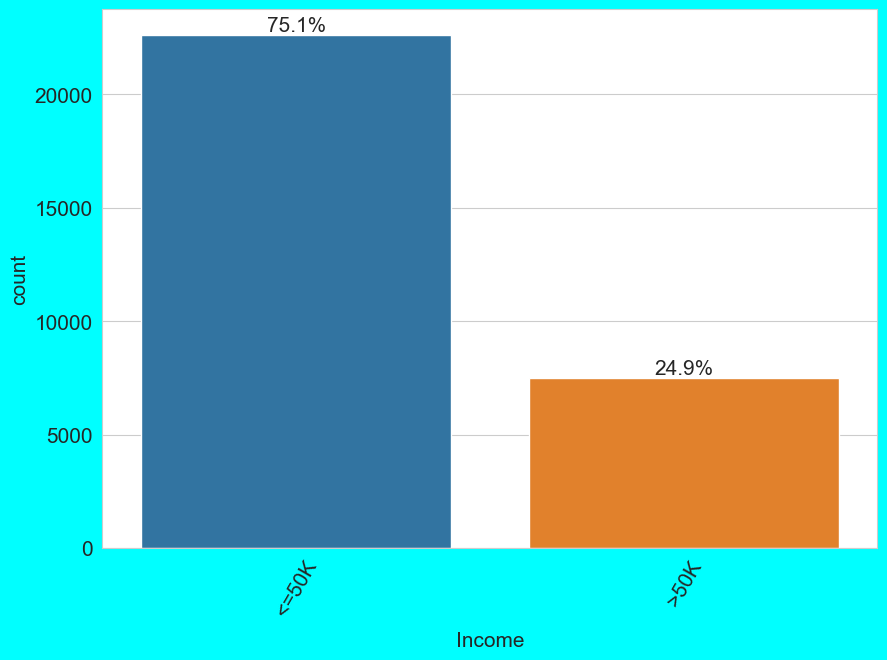

 <=50K    22632
 >50K      7506
Name: Income, dtype: int64

In [49]:
#countplot for 'Income'column

ax = sns.countplot(x = 'Income', data = df)
# Get the total number of rows in the DataFrame
total = len(df)

# Loop through the bars and annotate them with percentages
for p in ax.patches:
    # Calculate the percentage
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    # Get the x and y coordinates of the bar
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Annotate the bar with the percentage
    plt.text(x, y, percentage, ha='center', va='bottom',fontsize = 15)
    
    # Change fontsize and alignment of x axis labels
    ax.tick_params(axis='x', labelsize=15)  # Change fontsize here
    plt.xticks(rotation=60)  # Change alignment here

# Show the plot
plt.show()

df['Income'].value_counts()

**Recording Observations:**

1.  <=50K (22632): This category includes individuals whose income is less than or equal to $50,000. It represents the majority of the dataset and indicates a significant portion of individuals with lower or moderate income levels.

    
2.  >50K (7506): This category includes individuals whose income is greater than $50,000. It represents a smaller subset of the dataset and suggests individuals with higher income levels.
    

Analyzing the income distribution is crucial for understanding the economic landscape of the population represented in the dataset. Here are some additional points to consider:

**Income Disparity:** The dataset shows a clear division between individuals earning less than or equal to $50,000 and those earning more. Examining factors contributing to this income disparity, such as education, occupation, and industry, could provide valuable insights.



**Socioeconomic Patterns:** The income distribution can offer insights into socioeconomic patterns within the dataset. For example, it may reveal trends related to educational attainment, career choices, or regional economic variations.



**Policy Implications:** Understanding the income distribution is important for policymakers to design effective economic and social policies. It can inform decisions related to taxation, social welfare programs, and initiatives aimed at reducing income inequality.



**Demographic Considerations:**  Analyzing income distribution across demographic categories such as age, race, and gender can provide a nuanced understanding of how different groups are positioned economically.



In summary, the dataset's income distribution highlights the prevalence of individuals earning less than or equal to $50,000, with a smaller proportion earning more than $50,000. Further exploration of this data in conjunction with other variables can provide a comprehensive understanding of the factors influencing income levels within the population.




Target column is imbalanced


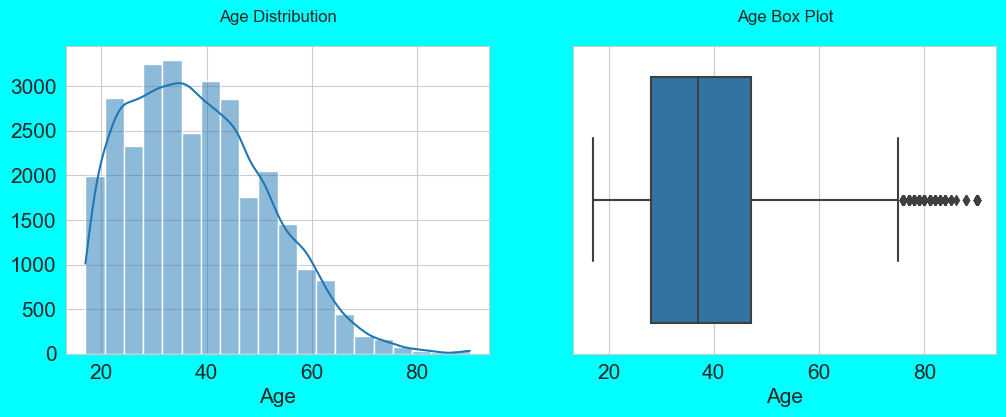

In [50]:
#Visualize 'Age' distribution
col = 'Age'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

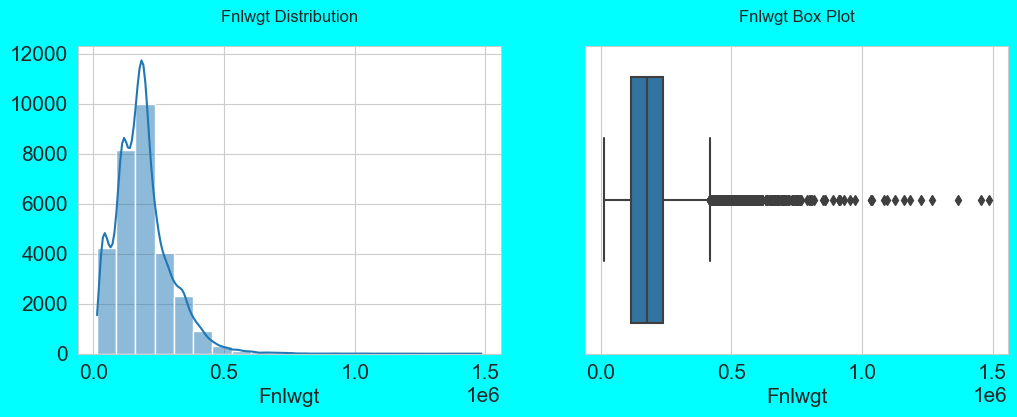

In [51]:
#Visualize 'Fnlwgt' distribution
col = 'Fnlwgt'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

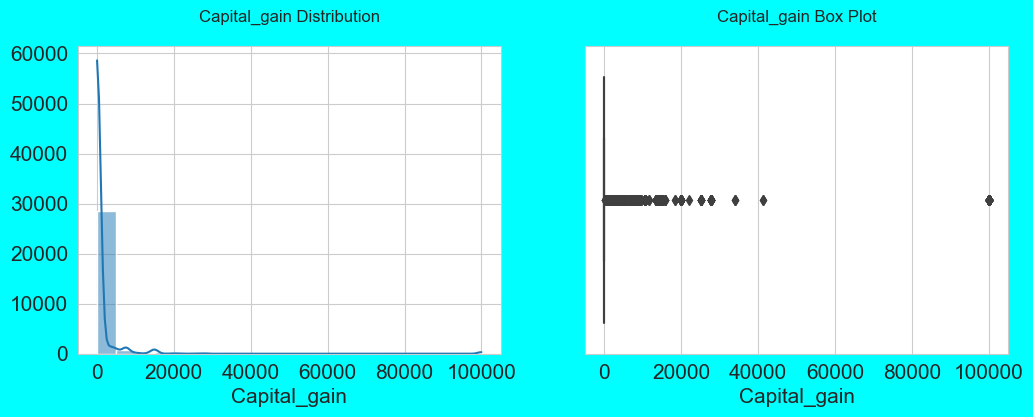

In [52]:
#Visualize 'Capital_gain' distribution
col = 'Capital_gain'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

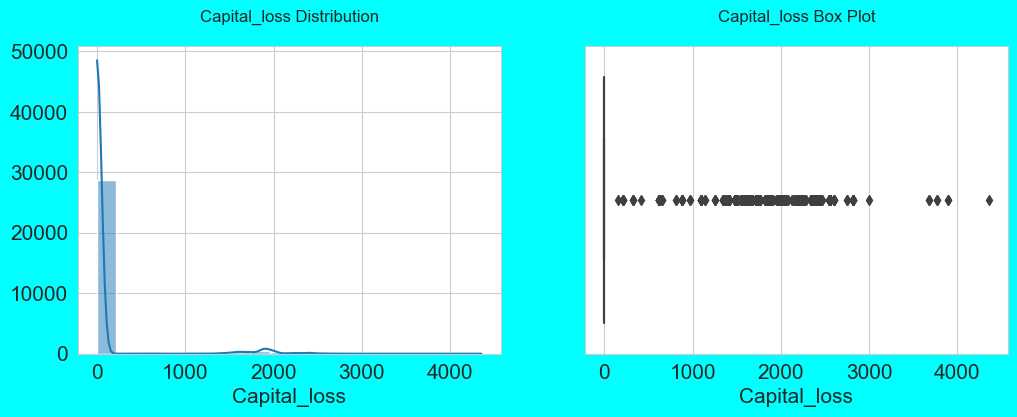

In [53]:
#Visualize 'Capital_loss' distribution
col = 'Capital_loss'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

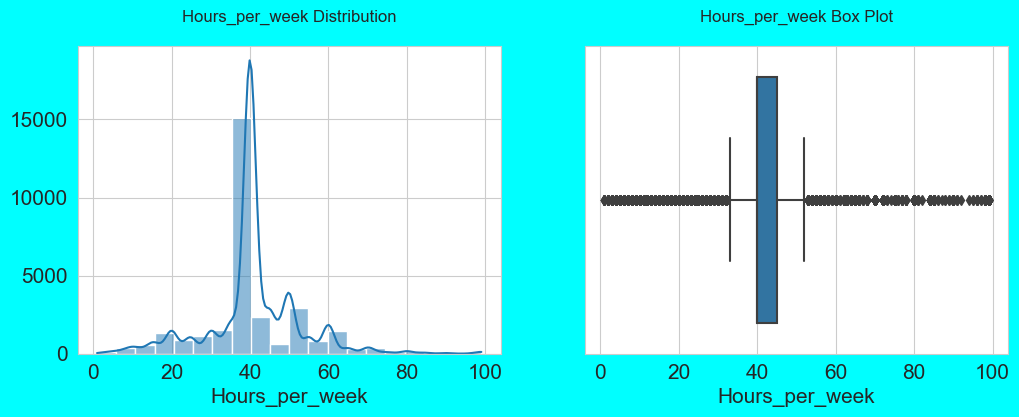

In [54]:
#Visualize ''Hours_per_week' distribution
col = 'Hours_per_week'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

The data distribution for age, fnlwght, Capital gain, Capital Loss and hours per week looks skewed and they have outliers present in them

**Bivariate Analysis**

In [55]:
#'Income' count based on 'Workclass'
grouped_df = df.groupby(['Income', 'Workclass']).size().unstack(fill_value=0)

grouped_df

Workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
Income,,,,,,,
<=50K,578,1458,17390,474,1784,934,14
>50K,365,609,4874,600,714,344,0


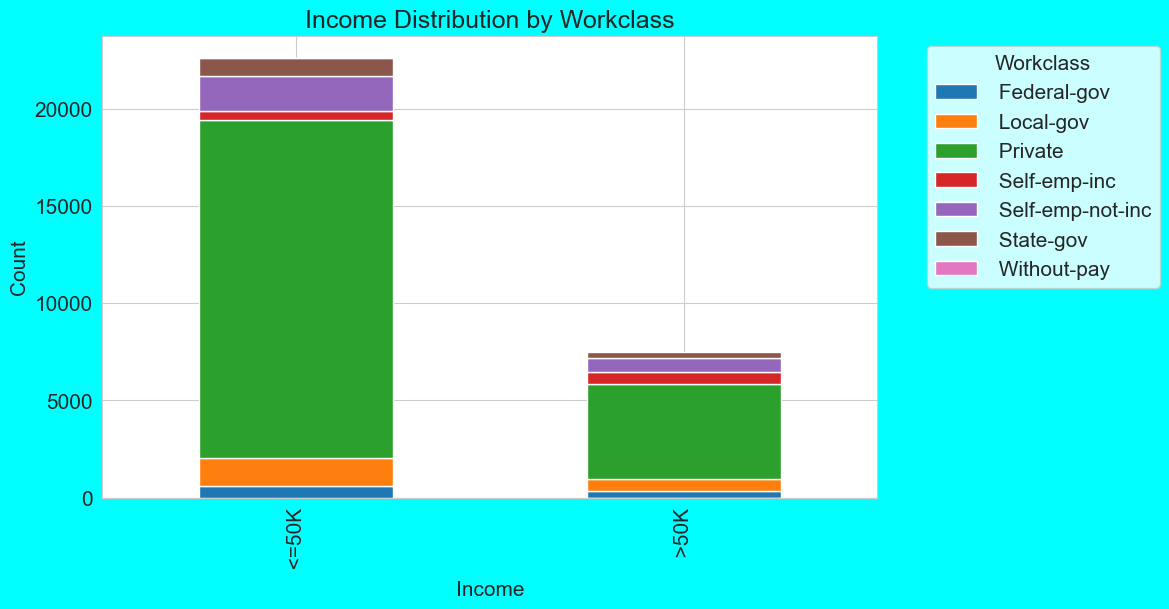

In [56]:
ax = grouped_df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Count')
ax.set_xlabel('Income')
ax.set_title('Income Distribution by Workclass')
plt.legend(title='Workclass', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

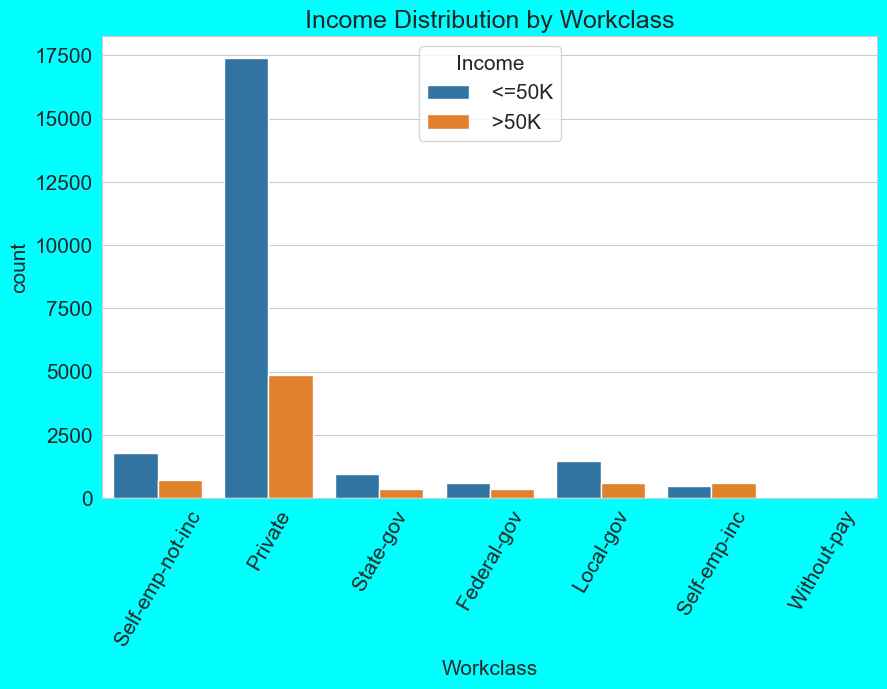

In [57]:
#Visualizing using countplot

plt.figure(figsize=(10,6))
sns.countplot(x='Workclass', hue='Income', data=df)
# Change fontsize and alignment of x axis labels
ax.tick_params(axis='x', labelsize=15)  # Change fontsize here
plt.xticks(rotation=60)  # Change alignment here
plt.title('Income Distribution by Workclass')
plt.show()

**Key Observations:**
    
**Income <=50K:**

Private (17390): The most common workclass for individuals with an income less than or equal to $50,000 is 'Private,' with a significant count of 17,390 individuals.


Self-emp-not-inc (1784): The second most common workclass in this income category is 'Self-emp-not-inc,' with 1,784 individuals.


Local-gov (1458): 'Local-gov' is also notable with 1,458 individuals.




**Income >50K:**

Private (4874): The most common workclass for individuals with an income greater than $50,000 is also 'Private,' with a count of 4,874 individuals.


Self-emp-inc (600): 'Self-emp-inc' is the second most common workclass in this income category, with 600 individuals.


Local-gov (609): 'Local-gov' is also notable with 609 individuals.



**Observations:**


Private Workclass Dominance: In both income categories, the 'Private' workclass dominates, indicating that a significant proportion of individuals, regardless of income, work in private industries.


Self-Employment: The 'Self-emp-not-inc' and 'Self-emp-inc' workclasses have notable representation, especially among those earning less than or equal to $50,000. This suggests a significant number of individuals with self-employment arrangements.



Government Employment: 'Local-gov' and 'Federal-gov' workclasses show some representation in both income categories, indicating individuals employed in local and federal government roles.



Without Pay: There are individuals in the '<=50K' category with 'Without-pay' workclass, but none in the '>50K' category. This may indicate individuals working without monetary compensation, possibly volunteering.

In [58]:
#'Income' count based on 'Education_num'
grouped_df = df.groupby(['Income', 'Education_num']).size().unstack(fill_value=0)

grouped_df

Education_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Income,,,,,,,,,,,,,,,,
<=50K,44,143,275,521,430,761,989,348,8218,5334,963,752,2915,708,136,95
>50K,0,6,12,35,25,59,59,29,1616,1335,344,256,2126,918,406,280


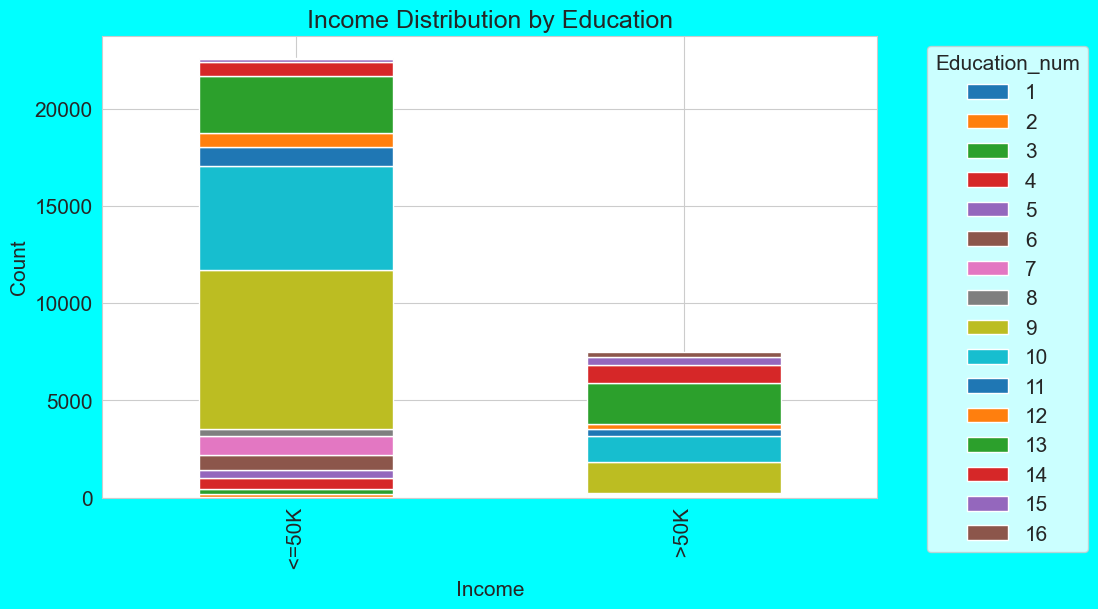

In [59]:
ax = grouped_df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Count')
ax.set_xlabel('Income')
ax.set_title('Income Distribution by Education')
plt.legend(title='Education_num', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

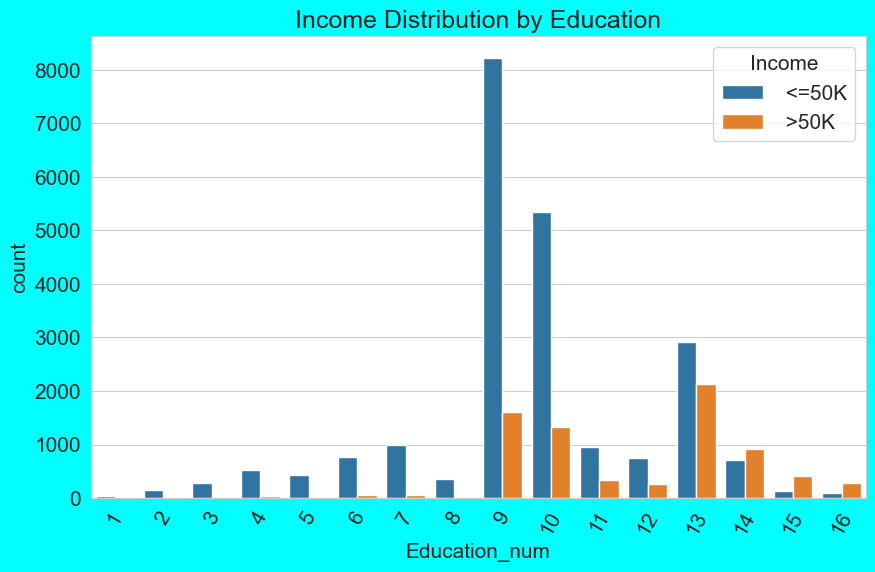

In [60]:
#Visualizing using countplot

plt.figure(figsize=(10,6))
sns.countplot(x='Education_num', hue='Income', data=df)
# Change fontsize and alignment of x axis labels
ax.tick_params(axis='x', labelsize=15)  # Change fontsize here
plt.xticks(rotation=60)  # Change alignment here
plt.title('Income Distribution by Education')
plt.show()

**Observations:**
    
    
**Associates and Bachelors Degrees:** Individuals with 'Associates degree' and 'Bachelors degree' tend to have higher representation in the '>50K' income category compared to the '<=50K' category. This suggests that higher education levels are associated with a higher likelihood of earning more than $50,000.



**Masters and Doctorate Degrees:** 'Masters degree' and 'Doctorate degree' (Education_num 14 and 16) show a significant increase in representation in the '>50K' income category. This is consistent with the expectation that advanced degrees often correlate with higher income.



**Some College but No Degree:** Education_num '9' (Some College but no degree) is the most common education level for both income categories, but the counts are higher in the '<=50K' category. This indicates that a significant portion of individuals with some college education is earning less than or equal to $50,000.

In [61]:
#'Income' count based on 'Marital_status'
grouped_df = df.groupby(['Income', 'Marital_status']).size().unstack(fill_value=0)

grouped_df

Marital_status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
Income,,,,,,,
<=50K,3760,11,7662,339,9240,873,747
>50K,452,10,6397,31,470,66,80


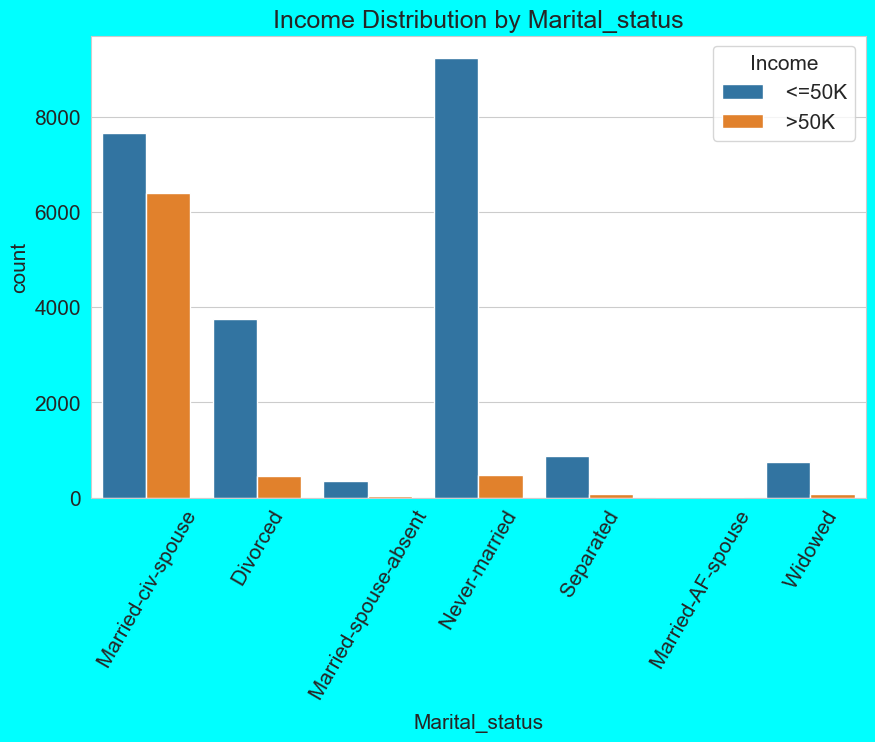

In [62]:
#Visualizing using countplot

plt.figure(figsize=(10,6))
sns.countplot(x='Marital_status', hue='Income', data=df)
# Change fontsize and alignment of x axis labels
ax.tick_params(axis='x', labelsize=15)  # Change fontsize here
plt.xticks(rotation=60)  # Change alignment here
plt.title('Income Distribution by Marital_status')
plt.show()

**Observations:**
    
**Married Individuals:** In both income categories, 'Married-civ-spouse' is a common marital status, suggesting that being married is a prevalent status among individuals. However, it's more prominent in the '>50K' income category, indicating a potential correlation between being married and having higher income.

    
**Never-Married Individuals:** 'Never-married' is the most common marital status in the '<=50K' category, indicating that a significant portion of individuals with lower income levels has never been married. The count decreases in the '>50K' category, suggesting that marriage might be associated with higher income.

    
**Divorced, Separated, and Widowed Individuals:** These categories also contribute to the overall distribution, but the counts vary between income categories. For example, the count of 'Divorced' individuals is higher in the '<=50K' category, while the count of 'Separated' and 'Widowed' individuals is more balanced between the two income categories.

In [63]:
#'Income' count based on 'Occupation'
grouped_df = df.groupby(['Income', 'Occupation']).size().unstack(fill_value=0)

grouped_df

Occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
Income,,,,,,,,,,,,,,
<=50K,3220,8,3117,2054,872,1266,1720,3077,140,2224,434,2614,633,1253
>50K,498,1,908,1937,115,83,244,132,1,1810,210,970,278,319


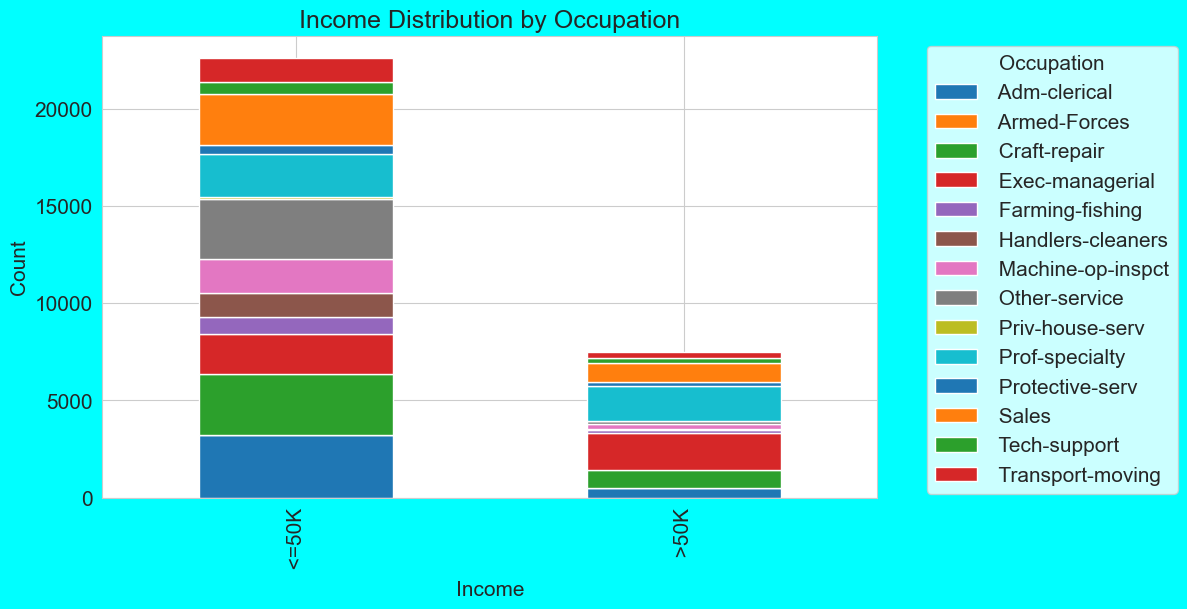

In [64]:
ax = grouped_df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Count')
ax.set_xlabel('Income')
ax.set_title('Income Distribution by Occupation')
plt.legend(title= 'Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

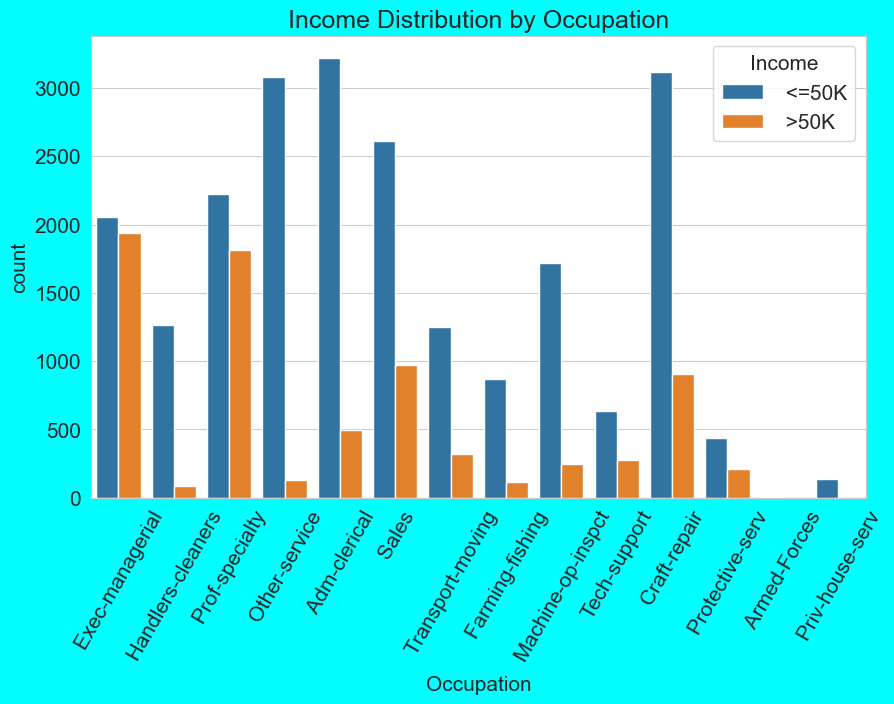

In [65]:
#Visualizing using countplot

plt.figure(figsize=(10,6))
sns.countplot(x='Occupation', hue='Income', data=df)
# Change fontsize and alignment of x axis labels
ax.tick_params(axis='x', labelsize=15)  # Change fontsize here
plt.xticks(rotation=60)  # Change alignment here
plt.title('Income Distribution by Occupation')
plt.show()

**Observations:**
    
    
**Professional Occupations:** 'Prof-specialty' is a common occupation in both income categories, but it is the most prevalent in the '>50K' category. This suggests a strong correlation between professional roles and higher income.

    
**Managerial and Executive Roles:** 'Exec-managerial' is a common occupation in both income categories, indicating that individuals in managerial and executive roles can be found across income levels.

    
**Crafts and Repair Roles:** 'Craft-repair' is prevalent in both income categories, suggesting that individuals in crafts and repair roles can be found in various income brackets.

    
**Protective Services:** 'Protective-serv' is more common in the '>50K' category, suggesting that individuals in protective service roles, such as police officers, may have a higher likelihood of earning more than $50,000.

In [66]:
#'Income' count based on 'Relationship'
grouped_df = df.groupby(['Income', 'Relationship']).size().unstack(fill_value=0)

grouped_df

Relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
Income,,,,,,
<=50K,6780,6890,854,4398,2998,712
>50K,5677,823,35,64,213,694


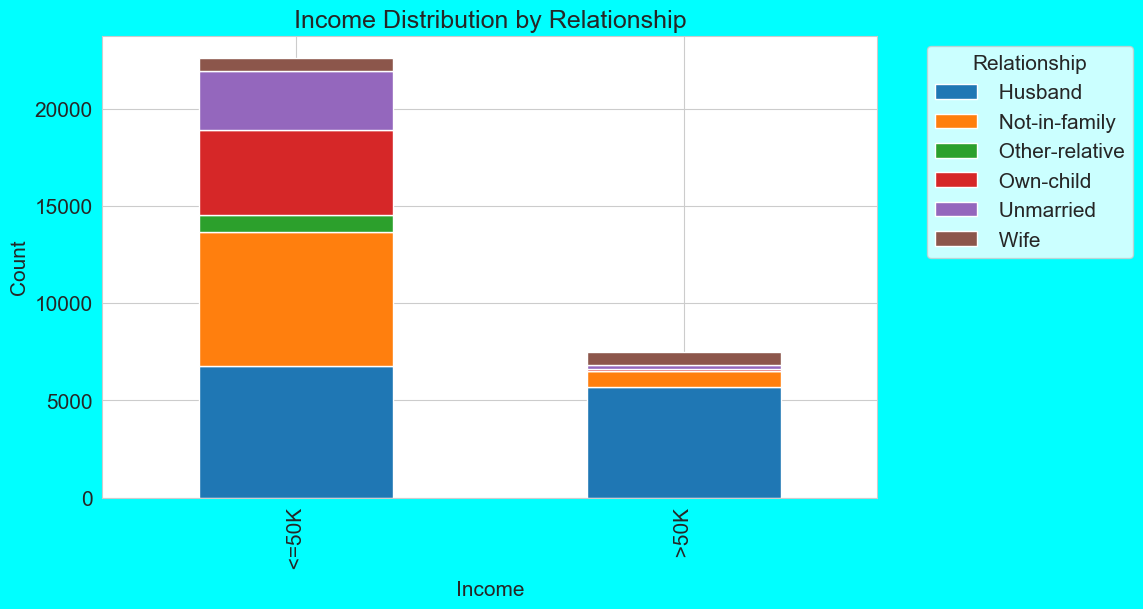

In [67]:
ax = grouped_df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Count')
ax.set_xlabel('Income')
ax.set_title('Income Distribution by Relationship')
plt.legend(title= 'Relationship', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

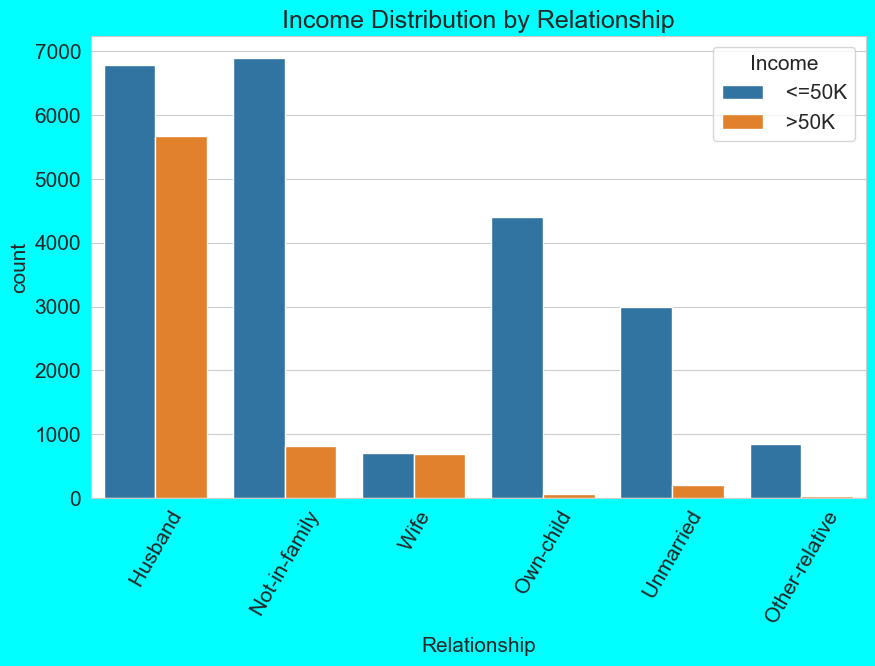

In [68]:
#Visualizing using countplot

plt.figure(figsize=(10,6))
sns.countplot(x='Relationship', hue='Income', data=df)
# Change fontsize and alignment of x axis labels
ax.tick_params(axis='x', labelsize=15)  # Change fontsize here
plt.xticks(rotation=60)  # Change alignment here
plt.title('Income Distribution by Relationship')
plt.show()

**Observations:**
    
    
1. Married Individuals: 'Husband' and 'Wife' are common relationship statuses in both income categories, indicating the presence of married individuals. However, 'Husband' is more prevalent in the '>50K' category, suggesting a strong association between being married (particularly as a husband) and having higher income.

    
    
2. Not-in-family: 'Not-in-family' is a common relationship status in both income categories, suggesting that a significant number of individuals, regardless of income, may not be part of a family household.

    
    
3. Own-child: 'Own-child' is more common in the '<=50K' category, indicating that individuals with lower income levels are more likely to have dependent children.

    
    
4. Other-relative: 'Other-relative' has a moderate count in the '<=50K' category but a much lower count in the '>50K' category, suggesting that individuals with other relatives in the household are more common among those with lower income.



In [69]:
#'Income' count based on 'Race'
grouped_df = df.groupby(['Income', 'Race']).size().unstack(fill_value=0)

grouped_df

Race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
Income,,,,,
<=50K,252,646,2450,210,19074
>50K,34,248,366,21,6837


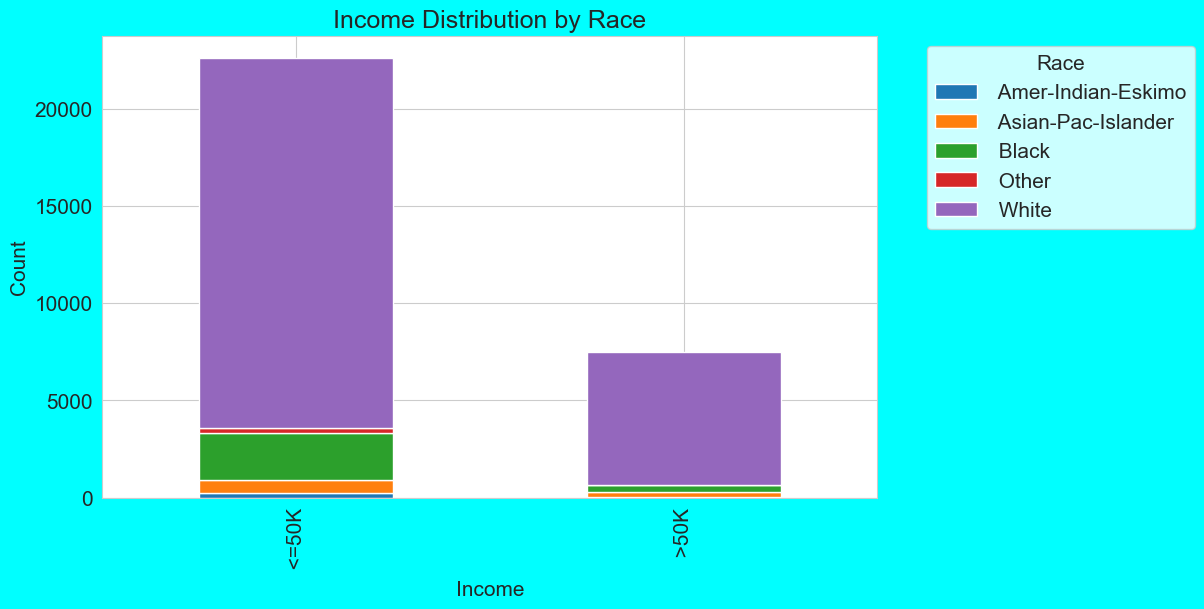

In [70]:
ax = grouped_df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Count')
ax.set_xlabel('Income')
ax.set_title('Income Distribution by Race')
plt.legend(title= 'Race', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

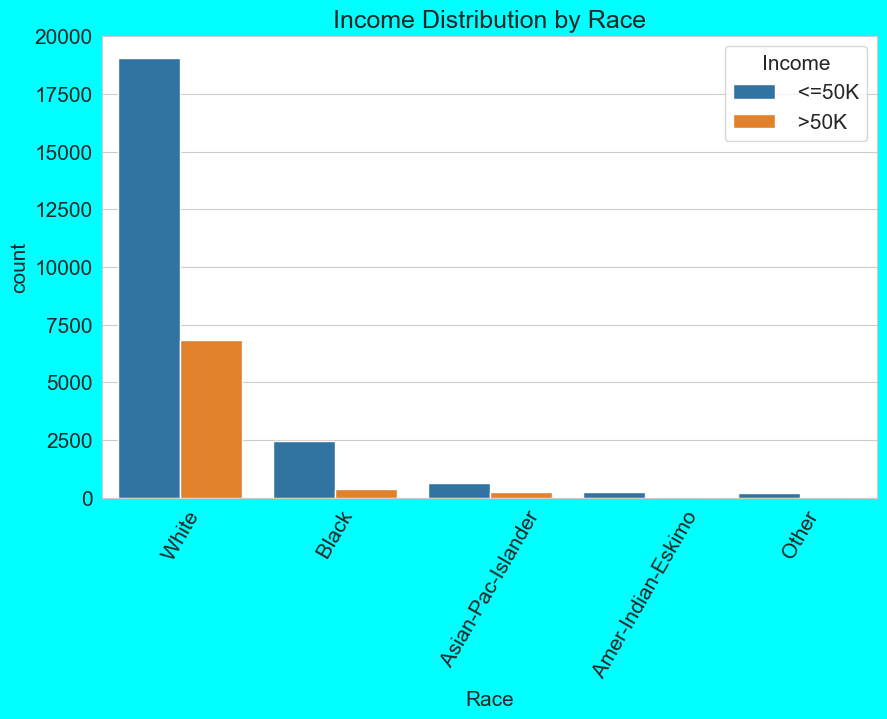

In [71]:
#Visualizing using countplot

plt.figure(figsize=(10,6))
sns.countplot(x='Race', hue='Income', data=df)
# Change fontsize and alignment of x axis labels
ax.tick_params(axis='x', labelsize=15)  # Change fontsize here
plt.xticks(rotation=60)  # Change alignment here
plt.title('Income Distribution by Race')
plt.show()

**Observations:**
    
    
**White Individuals:** 'White' is the most prevalent race category in both income categories, but the count is significantly higher in the '<=50K' category. This suggests that the dataset contains a large number of white individuals, and a substantial portion of them earns less than or equal to $50,000.

    
    
**Asian-Pac-Islander Individuals:** 'Asian-Pac-Islander' individuals are relatively more represented in the '>50K' income category. This may indicate a higher likelihood of individuals from this racial group earning more than $50,000.

    
    
**Black and Amer-Indian-Eskimo Individuals:** 'Black' and 'Amer-Indian-Eskimo' individuals have lower counts in the '>50K' category, suggesting that individuals from these racial groups are less prevalent among those with higher incomes.

In [72]:
#'Income' count based on 'Sex'
grouped_df = df.groupby(['Income', 'Sex']).size().unstack(fill_value=0)

grouped_df

Sex,Female,Male
Income,,
<=50K,8661,13971
>50K,1112,6394


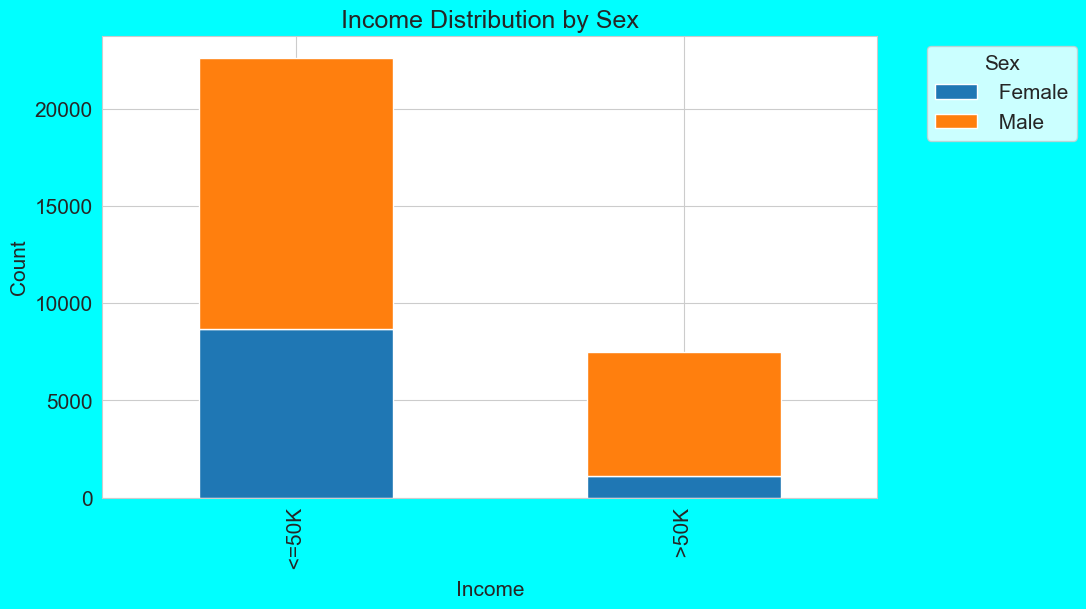

In [73]:
ax = grouped_df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Count')
ax.set_xlabel('Income')
ax.set_title('Income Distribution by Sex')
plt.legend(title= 'Sex', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

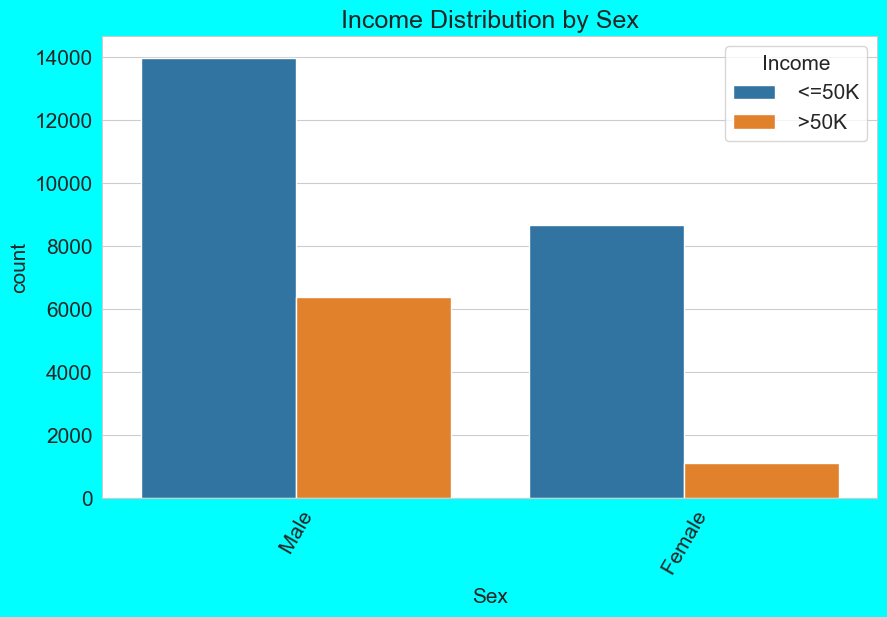

In [74]:
#Visualizing using countplot

plt.figure(figsize=(10,6))
sns.countplot(x='Sex', hue='Income', data=df)
# Change fontsize and alignment of x axis labels
ax.tick_params(axis='x', labelsize=15)  # Change fontsize here
plt.xticks(rotation=60)  # Change alignment here
plt.title('Income Distribution by Sex')
plt.show()

**Observations**


**Income Distribution:**

**<=50K Income:**

Female: 8661 / (8661 + 13971) = 38.28%

Male: 13971 / (8661 + 13971) = 61.72%


**> 50K Income:**

Female: 1112 / (1112 + 6394) = 14.80%


Male: 6394 / (1112 + 6394) = 85.20%


**Gender Distribution:**

Female:


**<=50K Income:** (Female)

8661 / (8661 + 1112) = 88.60%


**> 50K Income: 

1112 / (8661 + 1112) = 11.40%


Male:

**<=50K Income:**

13971 / (13971 + 6394) = 68.61%


**> 50K Income:**
6394 / (13971 + 6394) = 31.39%

**Income Disparities:**

The data indicates a gender income disparity, with a higher percentage of males having an income >50K compared to females.


**Overall Analysis:**


The majority of individuals, regardless of gender, have an income <=50K.


Males tend to have a higher representation in the >50K income category compared to females.

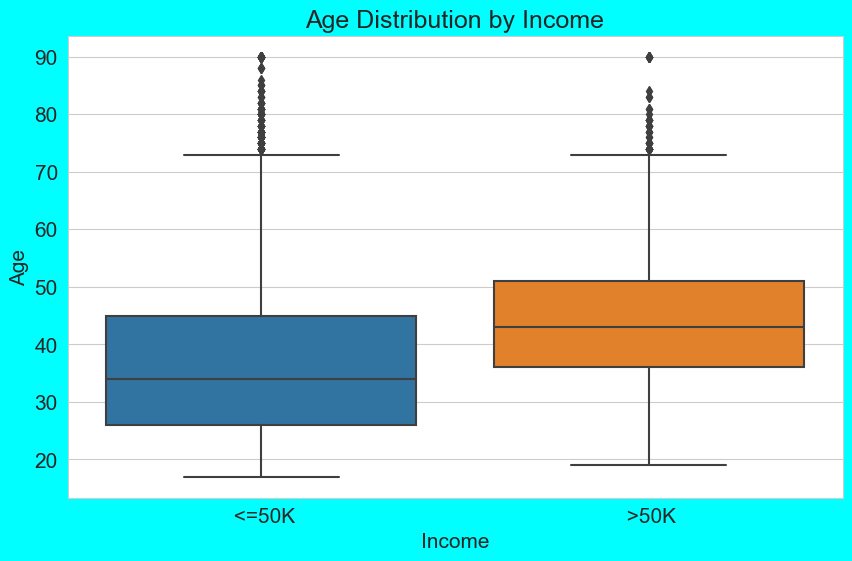

In [75]:
#Age distribution by income
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income', y='Age', data=df)
plt.title('Age Distribution by Income')
plt.show()

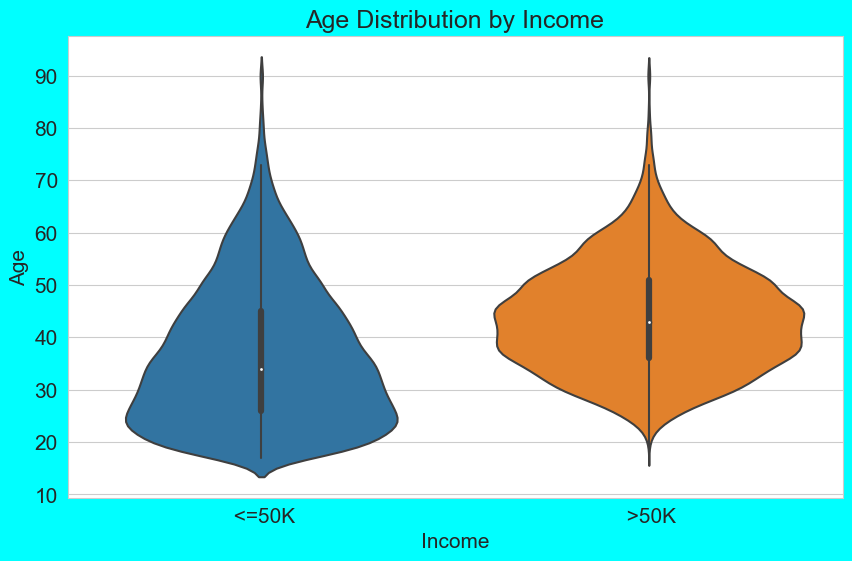

In [76]:
# Alternatively, we can use a violin plot for a different perspective
plt.figure(figsize=(10, 6))
sns.violinplot(x='Income', y='Age', data=df)
plt.title('Age Distribution by Income')
plt.show()

**Observations:**


**Income Groups:** There are two groups represented by violins in different colors. The blue violin is for “<=50K” and the orange violin is for “>50K”.


**Age Distribution:** The width of each violin at different ages indicates the density of people at that age within each income group. A wider section means a higher density of people at that age.


**Median Age:** Inside each violin, a black line represents the median age for each income group.


**Peaks:** The “<=50K” group shows a peak around ages 40-45, while the “>50K” group has a more even distribution with a slight peak around ages 40-60.

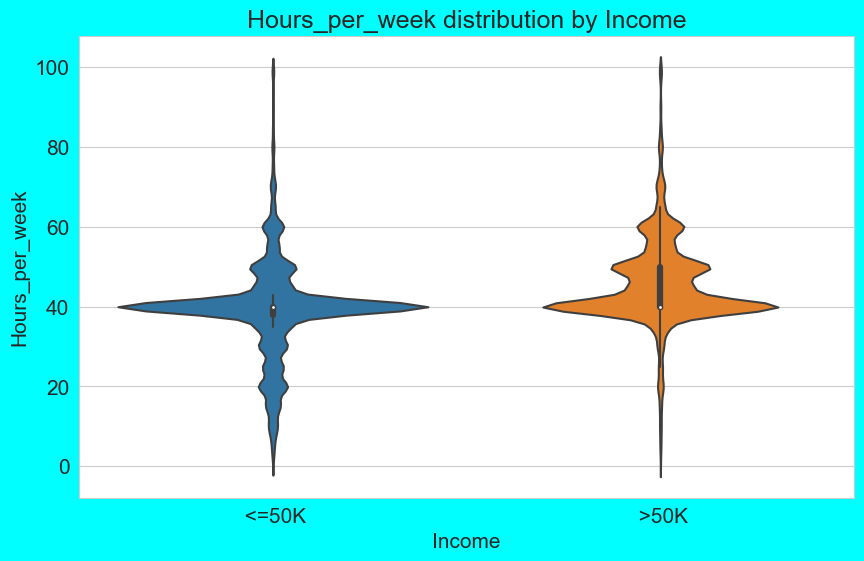

In [77]:
# Violin plot for income vs Hours per week
plt.figure(figsize=(10, 6))
sns.violinplot(x='Income', y='Hours_per_week', data=df)
plt.title('Hours_per_week distribution by Income')
plt.show()

**Observations:**
    
**Hours Worked Distribution:**
    
**<=50K Group:** The plot is widest around 40 hours per week, indicating that the majority of individuals in this income bracket work standard full-time hours. The plot narrows for hours significantly less or more than 40, showing fewer people work part-time or overtime.
    
    
**>50K Group:** This plot is wider, suggesting a greater variance in work hours. There’s a noticeable concentration around 40-60 hours, implying many high earners work longer hours.

In [78]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [79]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

# Treating Outliers

In [80]:
##Zscore method

columns = ['Age', 'Fnlwgt', 'Capital_gain',
       'Capital_loss','Hours_per_week']

#evaluating zscore for outlier detection
from scipy.stats import zscore
z = np.abs(zscore(df[columns]))
z

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
0,0.880201,1.007866,0.147495,0.218677,2.332024
1,0.033637,0.244634,0.147495,0.218677,0.078033
2,1.108661,0.425172,0.147495,0.218677,0.078033
3,0.795169,1.406540,0.147495,0.218677,0.078033
4,0.109790,0.897087,0.147495,0.218677,0.078033
...,...,...,...,...,...
32555,0.871322,0.638893,0.147495,0.218677,0.244995
32556,0.118669,0.335282,0.147495,0.218677,0.078033
32557,1.489427,0.358603,0.147495,0.218677,0.078033
32558,1.252088,0.110653,0.147495,0.218677,1.747656


In [81]:
# setting a minimum threshold >3
np.where(z>3)

(array([    9,    21,    25, ..., 30064, 30094, 30101], dtype=int64),
 array([4, 3, 4, ..., 4, 1, 2], dtype=int64))

In [82]:
#making a new dataframe removing outliers
df1 = df[(z<3).all(axis =1)]
df1.shape

(27774, 14)

In [83]:
print('Old Data Frame shape', df.shape[0])
print('New Data Frame shape', df1.shape[0])
print('Data Loss Percentage = ', ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Old Data Frame shape 30138
New Data Frame shape 27774
Data Loss Percentage =  7.8439179773044


Data loss percentage is below 10% with z score method.

In [84]:
df1.duplicated().sum()

0

# Skewness Treatment

In [85]:
df1.skew()

Age                0.447039
Fnlwgt             0.630072
Education_num     -0.315221
Capital_gain       4.869135
Capital_loss      29.086188
Hours_per_week    -0.279475
dtype: float64

Skewness value for capital loss is very high, so we will treat this column

In [86]:
#Using power transformer to remove skewness and applying yeo-johnson
from sklearn.preprocessing import PowerTransformer
import pandas as pd

# Assuming df is your DataFrame and it has columns as you mentioned
cols_to_transform = ['Capital_gain','Capital_loss']

# Initialize PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)

# Apply the power transformation
for col in cols_to_transform:
    # Reshape the data because the PowerTransformer expects data in shape (-1, 1)
    data = df1[col].values.reshape(-1, 1)
    
    # Transform the data
    df1[col] = pt.fit_transform(data)

# Now your DataFrame df1 has these columns power transformed

df1.skew()

Age                0.447039
Fnlwgt             0.630072
Education_num     -0.315221
Capital_gain       3.062511
Capital_loss      24.512225
Hours_per_week    -0.279475
dtype: float64

The skewness values have improved a little bit

# Encoding Categorical Columns

In [87]:
df1.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [88]:
from sklearn.preprocessing import LabelEncoder

cat_columns = ['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country','Income']

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for column in cat_columns:
    df1[column] = label_encoder.fit_transform(df1[column])

# Display the encoded DataFrame
df1


,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,13,2,3,0,4,1,-0.297622,-0.04073,13,37,0
1,38,2,215646,9,0,5,1,4,1,-0.297622,-0.04073,40,37,0
2,53,2,234721,7,2,5,0,2,1,-0.297622,-0.04073,40,37,0
3,28,2,338409,13,2,9,5,2,0,-0.297622,-0.04073,40,4,0
4,37,2,284582,14,2,3,5,4,0,-0.297622,-0.04073,40,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,12,2,12,5,4,0,-0.297622,-0.04073,38,37,0
32556,40,2,154374,9,2,6,0,4,1,-0.297622,-0.04073,40,37,1
32557,58,2,151910,9,6,0,4,4,0,-0.297622,-0.04073,40,37,0
32558,22,2,201490,9,4,0,3,4,1,-0.297622,-0.04073,20,37,0


In [89]:
df1.corr()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.072144,-0.073922,0.035416,-0.291999,-0.006975,-0.247939,0.021198,0.077924,0.115089,0.019962,0.119017,-0.004304,0.243418
Workclass,0.072144,1.000000,-0.031094,0.035820,-0.030918,0.016061,-0.067145,0.041828,0.072495,0.008728,-0.008141,0.034937,0.008904,0.009036
Fnlwgt,-0.073922,-0.031094,1.000000,-0.047776,0.032995,-0.001994,0.006939,-0.012017,0.028413,-0.008110,-0.002782,-0.021021,-0.069944,-0.011213
Education_num,0.035416,0.035820,-0.047776,1.000000,-0.056116,0.083463,-0.088241,0.032462,-0.000396,0.107478,0.007767,0.153821,0.095452,0.317293
Marital_status,-0.291999,-0.030918,0.032995,-0.056116,1.000000,0.023058,0.176937,-0.066958,-0.115079,-0.063184,-0.016584,-0.196362,-0.024224,-0.189244
Occupation,-0.006975,0.016061,-0.001994,0.083463,0.023058,1.000000,-0.052327,0.002433,0.063735,0.008794,0.000247,0.006625,-0.002077,0.045839
Relationship,-0.247939,-0.067145,0.006939,-0.088241,0.176937,-0.052327,1.000000,-0.118380,-0.579704,-0.081195,0.040954,-0.266756,-0.010507,-0.245068
Race,0.021198,0.041828,-0.012017,0.032462,-0.066958,0.002433,-0.118380,1.000000,0.092773,0.023632,-0.002184,0.052519,0.124669,0.071219
Sex,0.077924,0.072495,0.028413,-0.000396,-0.115079,0.063735,-0.579704,0.092773,1.000000,0.066876,-0.037047,0.234721,0.000023,0.210039
Capital_gain,0.115089,0.008728,-0.008110,0.107478,-0.063184,0.008794,-0.081195,0.023632,0.066876,1.000000,-0.012122,0.077601,0.010921,0.263208


# Feature Scaling

In [90]:
#Feature and Target for Classification
y = df1['Income']
X = df1.drop('Income', axis = 1)

In [91]:
#scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [92]:
x.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.927629,1.910066,-1.079779,1.169321,-0.392756,-0.726578,-0.904449,0.386849,0.705618,-0.297622,-0.04073,-2.542496,0.267309
1,-0.004880,-0.199872,0.318577,-0.424179,-1.719086,-0.230975,-0.281352,0.386849,0.705618,-0.297622,-0.04073,-0.034056,0.267309
2,1.160756,-0.199872,0.520138,-1.220929,-0.392756,-0.230975,-0.904449,-1.996809,0.705618,-0.297622,-0.04073,-0.034056,0.267309
3,-0.781970,-0.199872,1.615787,1.169321,-0.392756,0.760232,2.211038,-1.996809,-1.417198,-0.297622,-0.04073,-0.034056,-5.259423
4,-0.082589,-0.199872,1.047009,1.567696,-0.392756,-0.726578,2.211038,0.386849,-1.417198,-0.297622,-0.04073,-0.034056,0.267309


In [93]:
y.value_counts()

0    21393
1     6381
Name: Income, dtype: int64

# Treating for mulitcollinearity

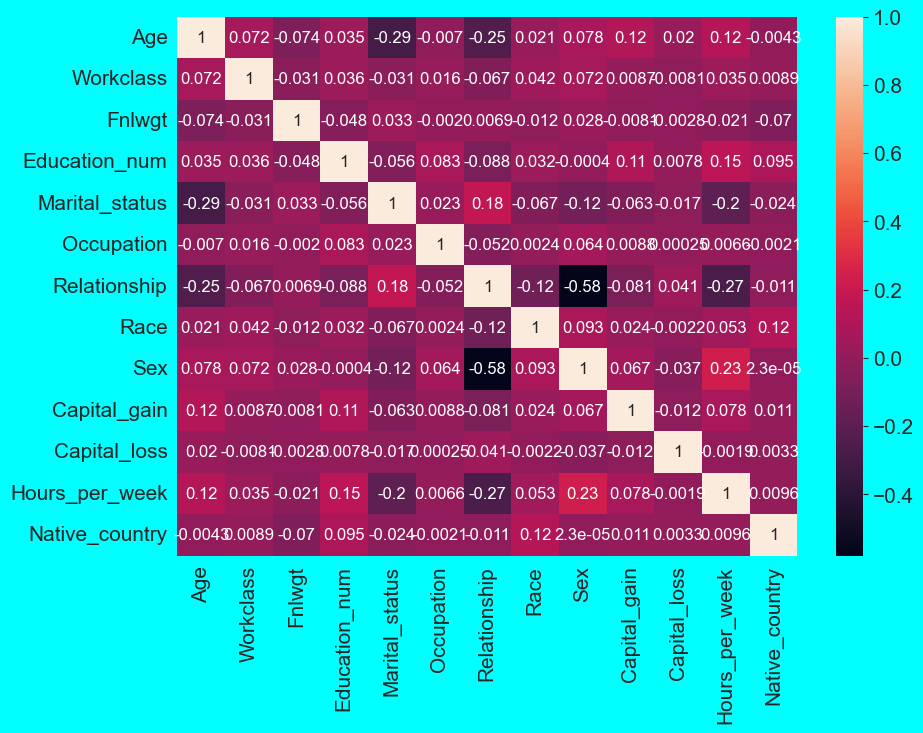

In [94]:
#Visualizing using heatmap


#Regression
sns.heatmap(x.corr(),annot= True,annot_kws = {'size':12})
plt.show()

In [95]:
x.corr()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
Age,1.000000,0.072144,-0.073922,0.035416,-0.291999,-0.006975,-0.247939,0.021198,0.077924,0.115089,0.019962,0.119017,-0.004304
Workclass,0.072144,1.000000,-0.031094,0.035820,-0.030918,0.016061,-0.067145,0.041828,0.072495,0.008728,-0.008141,0.034937,0.008904
Fnlwgt,-0.073922,-0.031094,1.000000,-0.047776,0.032995,-0.001994,0.006939,-0.012017,0.028413,-0.008110,-0.002782,-0.021021,-0.069944
Education_num,0.035416,0.035820,-0.047776,1.000000,-0.056116,0.083463,-0.088241,0.032462,-0.000396,0.107478,0.007767,0.153821,0.095452
Marital_status,-0.291999,-0.030918,0.032995,-0.056116,1.000000,0.023058,0.176937,-0.066958,-0.115079,-0.063184,-0.016584,-0.196362,-0.024224
Occupation,-0.006975,0.016061,-0.001994,0.083463,0.023058,1.000000,-0.052327,0.002433,0.063735,0.008794,0.000247,0.006625,-0.002077
Relationship,-0.247939,-0.067145,0.006939,-0.088241,0.176937,-0.052327,1.000000,-0.118380,-0.579704,-0.081195,0.040954,-0.266756,-0.010507
Race,0.021198,0.041828,-0.012017,0.032462,-0.066958,0.002433,-0.118380,1.000000,0.092773,0.023632,-0.002184,0.052519,0.124669
Sex,0.077924,0.072495,0.028413,-0.000396,-0.115079,0.063735,-0.579704,0.092773,1.000000,0.066876,-0.037047,0.234721,0.000023
Capital_gain,0.115089,0.008728,-0.008110,0.107478,-0.063184,0.008794,-0.081195,0.023632,0.066876,1.000000,-0.012122,0.077601,0.010921


# VIF

In [96]:
#vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,1.173269,Age
1,1.013085,Workclass
2,1.014272,Fnlwgt
3,1.062596,Education_num
4,1.137728,Marital_status
5,1.013300,Occupation
6,1.666301,Relationship
7,1.034893,Race
8,1.556720,Sex
9,1.030278,Capital_gain


VIF values look well below 5. There is no multicollinearity issue.

# Target Imbalance

In [97]:
y.value_counts()

0    21393
1     6381
Name: Income, dtype: int64

In [98]:
#Downsampling using Smote Method
!pip install imbalanced-learn
from imblearn.under_sampling import NearMiss

# Assuming x and y are your feature and target variables, respectively
nm = NearMiss()
x, y = nm.fit_resample(x, y)

Defaulting to user installation because normal site-packages is not writeable


In [99]:
y.value_counts()

0    6381
1    6381
Name: Income, dtype: int64

# Modelling

In [100]:
#finding random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRs = 0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i 
print('Best Accuracy is =', maxAccu,'at random state =', maxRS )

Best Accuracy is = 0.7427526769391486 at random state = 256


In [101]:
#Creating train and test split at random state = 256
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = maxRS)

In [102]:
#importing necessary libraries
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

In [103]:
#creating a function to evaluate models and check their scores
def evaluate_models(models, x_train, x_test, y_train, y_test):
    for name, model in models.items():
        # Fit the model to the training data
        model.fit(x_train, y_train)
        
        # Make predictions on the test data
        y_pred = model.predict(x_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Generate classification report
        class_report = classification_report(y_test, y_pred)
        
        # Generate confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Print the results
        print(f"Model: {name}")
        print(f"Accuracy: {accuracy*100}")
        print("Classification Report:")
        print(class_report)
        print("Confusion Matrix:")
        print(conf_matrix)
        print("-" * 60)

In [104]:
#collecting all the models inside by creating a dictionary
models = {"Logistic Regression": LogisticRegression(),"Decision Tree": DecisionTreeClassifier(),"Random Forest Classifier": RandomForestClassifier(),"XG Boost Classifier":xgb.XGBClassifier(),"SVM Classifier": SVC(),"Gradient Boosting Classifier": GradientBoostingClassifier(),"AdaBoost Classifier": AdaBoostClassifier(),"Bagging Classifier": BaggingClassifier(),"ExtraTrees Classifier": ExtraTreesClassifier()}

In [105]:
#Checking scores
evaluate_models(models, x_train, x_test, y_train, y_test)

Model: Logistic Regression
Accuracy: 71.68973622355706
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      1926
           1       0.74      0.67      0.70      1903

    accuracy                           0.72      3829
   macro avg       0.72      0.72      0.72      3829
weighted avg       0.72      0.72      0.72      3829

Confusion Matrix:
[[1473  453]
 [ 631 1272]]
------------------------------------------------------------
Model: Decision Tree
Accuracy: 67.74614781927396
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      1926
           1       0.68      0.67      0.67      1903

    accuracy                           0.68      3829
   macro avg       0.68      0.68      0.68      3829
weighted avg       0.68      0.68      0.68      3829

Confusion Matrix:
[[1317  609]
 [ 626 1277]]
---------------------------------------------

Two of our best performing models are Gradient Boosting Classifier and Random forest classifier as they give the same accuracy score

# Cross Validation Score


Checking cv score before selecting our final model

In [106]:
#creating a function to check cv score, mean of cv scores, accuracy score and difference between accuracy and cv score to identify the best model

from sklearn.model_selection import cross_val_score

def evaluate_cv(models, x, y, cv=5):
    for name, model in models.items():
        # Calculate cross-validation scores
        cv_scores = cross_val_score(model, x, y, cv=cv)
        
        # Calculate mean of the cross-validation scores
        cv_mean = cv_scores.mean()
        
        # Fit the model to the data
        model.fit(x, y)
        
        # Calculate accuracy score
        accuracy = model.score(x, y)
        
        # Calculate difference between accuracy and cross-validation mean
        diff = accuracy - cv_mean
        
        # Print the results
        print(f"Model: {name}")
        print(f"Cross-validation scores: {cv_scores}")
        print(f"Mean of CV scores: {cv_mean*100}")
        print(f"Accuracy score: {accuracy*100}")
        print(f"Difference between accuracy and CV mean: {diff}")
        print("-" * 60)

In [107]:
evaluate_cv(models, x, y)

Model: Logistic Regression
Cross-validation scores: [0.74813944 0.70544458 0.67554859 0.6637931  0.67163009]
Mean of CV scores: 69.29111611270532
Accuracy score: 70.18492399310453
Difference between accuracy and CV mean: 0.008938078803992111
------------------------------------------------------------
Model: Decision Tree
Cross-validation scores: [0.49314532 0.61143752 0.65634796 0.64811912 0.64733542]
Mean of CV scores: 61.127707031005386
Accuracy score: 99.99216423758031
Difference between accuracy and CV mean: 0.3886445720657493
------------------------------------------------------------
Model: Random Forest Classifier
Cross-validation scores: [0.5048962  0.68625147 0.7104232  0.71826019 0.69710031]
Mean of CV scores: 66.338627369362
Accuracy score: 99.98432847516064
Difference between accuracy and CV mean: 0.3364570110579863
------------------------------------------------------------
Model: XG Boost Classifier
Cross-validation scores: [0.57030944 0.72894634 0.72884013 0.74020376 

Considering these factors, Gradient Boosting appears to be a strong candidate for the best-performing model in this scenario, as it demonstrates high accuracy and a good cross-validation mean.We will perform additional hyperparameter tuning or explore ensemble methods to further improve performance.

# HyperParameter Tuning

In [110]:
GBC = GradientBoostingClassifier()
final_model = GBC.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

76.65186732828415


# Plotting ROC_AUC

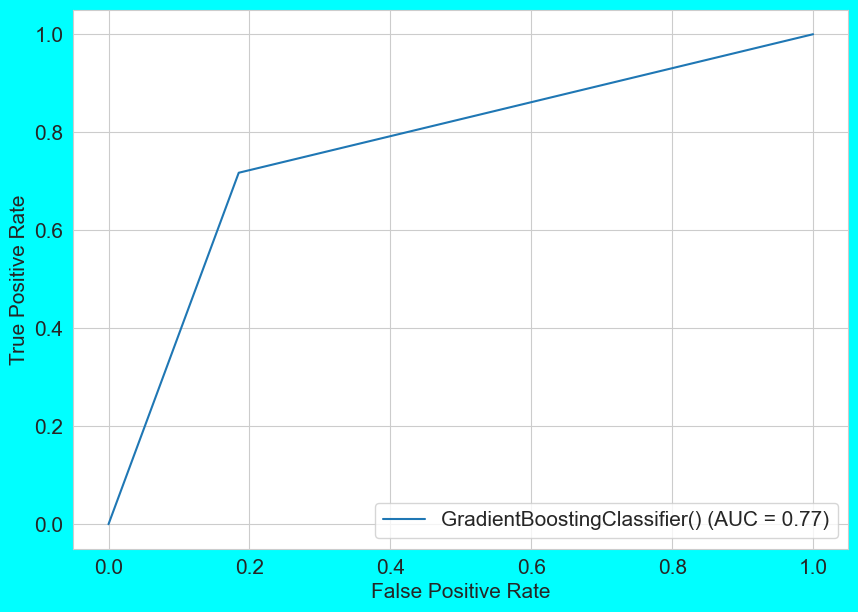

In [111]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr,tpr=tpr,roc_auc = roc_auc,estimator_name = final_model)
display.plot()

In this case, the AUC is 0.77, which is considered good. This means the classifier does a good job distinguishing between the positive and negative classes.

In [112]:
#Saving the model
import pickle
filename = 'CI.pkl'
pickle.dump(final_model,open(filename,'wb'))

In [113]:
import pickle
loaded_model = pickle.load(open('CI.pkl','rb'))
prediction = loaded_model.predict(x_test)
prediction

array([1, 0, 0, ..., 0, 1, 1])

In [114]:
a = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = a
df

,Predicted,Original
0,1,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
3824,1,0
3825,0,0
3826,0,0
3827,1,0
